## 1. Importujemy zestaw danych z cenami mieszkań

Pobierz dane z https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [418]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv("train.csv")
X_comp = pd.read_csv("test.csv").drop(columns="Id")
print("Wymiary wczytanych danych:", df.shape)
df.head()

Wymiary wczytanych danych: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Dzielimy dane na cechy i zmienną objaśnianą, usuwamy kolumnę "Id"

In [4]:
y = df.iloc[:,-1]
X = df.iloc[:,1:-1]

print("y shape:", y.shape)
print("X shape:", X.shape)
X.head()

y shape: (1460,)
X shape: (1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 3. Analiza wartości NaN

Sprawdźmy liczbę wartości NaN w konkretnych kolumnach:

In [141]:
for column in X.columns:
    sum_of_nan = X[column].isna().sum()
    if(sum_of_nan>0):
        print("Number of NaNs in", column, ":", sum_of_nan)

Number of NaNs in LotFrontage : 259
Number of NaNs in Alley : 1369
Number of NaNs in MasVnrType : 8
Number of NaNs in MasVnrArea : 8
Number of NaNs in BsmtQual : 37
Number of NaNs in BsmtCond : 37
Number of NaNs in BsmtExposure : 38
Number of NaNs in BsmtFinType1 : 37
Number of NaNs in BsmtFinType2 : 38
Number of NaNs in Electrical : 1
Number of NaNs in FireplaceQu : 690
Number of NaNs in GarageType : 81
Number of NaNs in GarageYrBlt : 81
Number of NaNs in GarageFinish : 81
Number of NaNs in GarageQual : 81
Number of NaNs in GarageCond : 81
Number of NaNs in PoolQC : 1453
Number of NaNs in Fence : 1179
Number of NaNs in MiscFeature : 1406


Widzimy, że zdecydowana większość NaN-ów występuje w cechach kategorialnych. Po sprawdzeniu w opisie danych okazuje się, że większość z nich (w obrębie wartości kategorialnych) oznacza brak danego elementu mieszkania - np. NaN w kolumnie GarageQual oznacza brak garażu. Inne cechy to:
- LotFrontage (odległość domu od ulicy) - NaN to najprawdopodobniej po prostu brak danych
- GarageYrBlt (rok budowy garażu) - NaN to brak garażu
- Electrical - w dokumentacji brakuje informacji o znaczeniu NaN. W całym zestawie danych występuje tylko jeden taki przypadek, więc nie ma ogromnego znaczenia dla modelu. Z jedej strony NaN mógłby oznaczać brak elektryczności, jednak pozostałe kolumny wskazują na obecność klimatyzacji (CentralAir), elektryczności (Utilities).

Początkowo bez namysłu zastosowałem w wartościach numerycznych wpisywanie średniej wartości, a w wartościach kategorialnych najczęściej występującej. Niestety było to bardzo kiepskie rozwiązanie. Przykładowo MiscFeature (dodatki do mieszkania, które nie pasowały do innych kategorii) to w 96% NaN, w 3% "shed" (budka), a pozostały 1% to inne dodatki. W metodzie najczęściej występującego elementu nagle 96% mieszkań "zyskało" budkę.

W kolejnej komórce wyświetlimy wszystkie kolumny powiązane z piwnicą dla kilku prób, w których wartość BsmtQual wynosi null:

In [872]:
X[X.BsmtQual.isna()][["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]].head(5)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0


Zauważmy, że null-e często występują w wielu połączonych tematycznie cechach. W tym przypadku oznacza to po prostu, że dom nie ma piwnicy. Inne kolumny mogą w takim przypadku przechowywać wartości 0 (np. liczba łazienek w piwnicy).

## 4. Zastosowanie "kodowania gorącojedynkowego" ("one hot encoding")

Kodowanie gorącojedynkowe potrafi dość sprawnie "obsłużyć" wartości NaN. Mieszkanie z wartością NaN w danej kategorii będzie miało po prostu zera w każdej, która się z niej wytworzy. Przykład: cecha "Alley" zawiera trzy możliwości - "Grvl" (aleja żwirowa), "Pave" (brukowana aleja) i NaN (brak alejki). Po enkodowaniu wartości zmieniłyby się na te przedstawione w tabeli:

|      | Alley_Grvl | Alley_Pave |
|------|------------|------------|
| Grvl |      1     |      0     |
| Pave |      0     |      1     |
| NaN  |      0     |      0     |

Funkcja get_dummies to odpowiednik OneHotEncodera działający na obiektach pandas. Dzięki temu będziemy mogli zachować indeksy.
Na razie w kategoriach numerycznych zamiast NaN-ów wpiszemy wartość średnią danej cechy.

In [114]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size=0.2, random_state=1, stratify=X.Neighborhood)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_numerical_imputed = imp.fit_transform(X_train.select_dtypes(exclude=['object'])) # chooses numerical features
X_train_numerical_imputed = pd.DataFrame(data=X_train_numerical_imputed, columns= X_train.select_dtypes(exclude=['object']).columns, index=y_train.index)

X_test_numerical_imputed = imp.transform(X_test.select_dtypes(exclude=['object']))
X_test_numerical_imputed = pd.DataFrame(data=X_test_numerical_imputed, columns=X_test.select_dtypes(exclude=['object']).columns, index=y_test.index)

X_categories_oh = pd.get_dummies(X.select_dtypes(include=['object'])) # chooses categorical features
X_train_categories_oh = X_categories_oh.iloc[y_train.index]
X_test_categories_oh = X_categories_oh.iloc[y_test.index]

X_train_imputed = pd.concat([X_train_numerical_imputed, X_train_categories_oh], axis=1)
X_test_imputed = pd.concat([X_test_numerical_imputed, X_test_categories_oh], axis=1)

X_imputed = pd.concat([X_train_imputed, X_test_imputed], axis=0).sort_index()
X_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Garage

Wyliczymy dokładność modelu regresji liniowej dla wszystkich cech. Będzie to pewien punkt odniesienia.

Ron Kohavi w swojej pracy "A study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection" (https://www.researchgate.net/publication/2352264_A_Study_of_Cross-Validation_and_Bootstrap_for_Accuracy_Estimation_and_Model_Selection) zaproponował, żeby domyślnie w ocenie modeli używać 10-krotnej walidacji krzyżowej. W modelach z małą ilością danych możemy wykorzystać nieco większą wartość, przy dużej liczbie prób - mniejszą. W takiej sytuacji zdecydowałem się na 15-krotną walidację krzyżową (zestaw testowy ma 1460 prób).

In [882]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

print(cross_val_score(LinearRegression(), X_imputed, y, cv=15).mean())

0.5699736523551955


Teraz wyliczymy informację wzajemną dla wszystkich cech i przedstawimy 50 z najwyższą.

In [883]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_imputed, y, random_state=0)
mi_with_columns = pd.Series(mi, name="Mutual Information", index=X_imputed.columns)
pd.set_option('display.max_rows', 288)
mi_with_columns.sort_values(ascending=False)[:50]

OverallQual              0.567588
GrLivArea                0.481445
TotalBsmtSF              0.366764
GarageArea               0.364231
GarageCars               0.362565
YearBuilt                0.361369
1stFlrSF                 0.310161
GarageYrBlt              0.288965
FullBath                 0.278567
MSSubClass               0.271740
ExterQual_TA             0.257825
YearRemodAdd             0.240382
TotRmsAbvGrd             0.226226
KitchenQual_TA           0.220397
ExterQual_Gd             0.210614
2ndFlrSF                 0.197821
LotFrontage              0.191171
Foundation_PConc         0.182458
BsmtQual_TA              0.176689
KitchenQual_Gd           0.172794
Fireplaces               0.168948
LotArea                  0.160768
OpenPorchSF              0.148126
BsmtFinSF1               0.146574
BsmtQual_Gd              0.146547
GarageFinish_Unf         0.138535
HeatingQC_Ex             0.124260
BsmtUnfSF                0.119711
GarageType_Attchd        0.118277
BsmtQual_Ex   

Spróbujemy znaleźć liczbę cech z najwyższą informacją wzajemną, dla której model lasu losowego zdobędzie największą dokładność. Jest to możliwe w sensownym czasie ze względu na niewielką liczbę cech. **Inny sposób na wstępny wybór cech to np. skorzystanie z modelu, który objaśnia istotność cech i wybranie najlepszych - zastosować można modele Lasso, Random Forest Regression. Pomocna może być też tablica korelacji pomiędzy cechami i analiza silnie skorelowanych (czasami dwie mogą mieć bardzo wysoką informację wzajemną względem cechy objaśnianej, jednak ze względu na silne skorelowanie nie ma sensu dołączyć obydwu).**

In [397]:
from sklearn.ensemble import RandomForestRegressor

def test_features_number_oh15(features_number):
    rfr = RandomForestRegressor(n_estimators=100, random_state=0)
    return cross_val_score(rfr, X_imputed[mi_with_columns.sort_values(ascending=False).index[:features_number]], y, cv=15, n_jobs=-1).mean()

max_score = 0
max_features_number = 0
for features_number in range(1, mi_with_columns.sort_values(ascending=False).shape[0]):
    score = test_features_number_oh15(features_number)
    print(features_number, score)
    if(score>max_score):
        max_score = score
        max_features_number = features_number

print("Max score:", max_score)
print("For number of features:", max_features_number)

1 0.6649801417132878
2 0.6988880014199886
3 0.7772600606331068
4 0.8016712244078644
5 0.8030196387888878
6 0.8268412787556306
7 0.8290686506587314
8 0.8285926323648944
9 0.828208114798818
10 0.8296871578354824
11 0.831143242083281
12 0.8364902872380974
13 0.8359082180451503
14 0.8367617543921104
15 0.8381293406748417
16 0.8396720121687338
17 0.8385185123836432
18 0.8400329801306193
19 0.8395657113340477
20 0.8392902843218951
21 0.8406467146775581
22 0.8453399728987073
23 0.8432909221211246
24 0.8544359298482008
25 0.8527792349500815
26 0.8535499496513168
27 0.8522334390524898
28 0.8498199694125895
29 0.8534963362014707
30 0.8535338771810768
31 0.8499757209490013
32 0.8533348064851071
33 0.8556096932823806
34 0.8566746719625608
35 0.8588859423493476
36 0.8573049112288437
37 0.8550819570424744
38 0.8574118407417823
39 0.8578370858678673
40 0.8578182537633405
41 0.8542864331695873
42 0.8542426911457899
43 0.8539014974168121
44 0.8548211376330237
45 0.8525540376245697
46 0.8575084146280276

Pozostaje wykonać ostateczny test na danych konkursowych:

In [886]:
X_comp_numerical_imputed = imp.transform(X_comp.select_dtypes(exclude=['object']))
X_comp_numerical_imputed = pd.DataFrame(data=X_comp_numerical_imputed, columns= X_comp.select_dtypes(exclude=['object']).columns, index=X_comp.index)

X_comp_categories_oh = pd.get_dummies(X_comp.select_dtypes(include=['object']))
X_comp_imputed = pd.concat([X_comp_numerical_imputed, X_comp_categories_oh], axis=1)

rfr.fit(X_imputed[mi_with_columns.sort_values(ascending=False).index[:78]], y)
predict_imputed = rfr.predict(X_comp_imputed[mi_with_columns.sort_values(ascending=False).index[:78]])
predict_imputed

array([126612.16, 157354.59, 177690.05, ..., 153456.24, 111850.  ,
       219215.77])

In [436]:
solution = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_imputed, name="SalePrice")], axis=1)
solution.to_csv('solution1.csv', index=False)

Strona z zadaniem pokazała wynik root-mean-square error (RMSE) 0.14445 (im mniej, tym lepiej). Funkcja ewaluacji cross_val_score to - (n/C) * (RMSE^2) + 1, gdzie C to stała (względem predykcji) wyliczana z realnych wartości y_true, do których porównywane są predykcje. W takim razie im wyższa wartość funkcji ewaluacji cross_val_score, tym niższa wartość RMSE.

## 4. Zastosowanie skali liczbowej

Po analizie dokumentacji możemy zauważyć, że bardzo duża część cech zawiera w sobie pewien typ skali, stopniowania. "FireplaceQu" przechowuje wartości "Ex" (excelent), "Gd" (good), "TA" (average), "Fa" (fair), "Po" (poor), NaN (no fireplace). Wprawdzie nie są to wartości liczbowe, jednak możemy je w pewien sposób uporządkować - możemy się spodziewać, że każda wcześniej wypisana kategoria jest bardziej oczekiwana (a co za tym idzie - będzie się wiązała ze średnio wyższą ceną) niż późniejsza. Spróbujemy zmienić tego typu kategorie podobnie do poniższej tabeli:

| Przed | Po |
|-------|----|
| Ex    |  5 |
| Gd    |  4 |
| TA    |  3 |
| Fa    | 2  |
| Po    | 1  |
| NaN   | 0  |

In [450]:
X_scale_num = pd.concat([X["Fence"].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan: 0}),
X["FireplaceQu"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X["GarageCond"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X["GarageFinish"].map({'Fin':3, 'RFn':2, 'Unf':1, np.nan:0}),
X["GarageQual"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X["PoolQC"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, np.nan:0}),
X["BsmtCond"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X["BsmtExposure"].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.nan:0}),
X["BsmtFinType1"].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0}),
X["BsmtFinType2"].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0}),
X["BsmtQual"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X["Street"].map({'Grvl':1, 'Pave':0}),
X["LotShape"].map({'Reg':3, 'IR1': 2, 'IR2': 1, 'IR3': 0}),
X["Utilities"].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}),
X["LandSlope"].map({'Gtl': 2, 'Mod': 1, 'Sev': 0}),
X["ExterQual"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X["ExterCond"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X["HeatingQC"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X["CentralAir"].map({'N':0, 'Y':1}),
X["KitchenQual"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X["Functional"].map({'Typ':0, 'Min1':1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7}),
X["PavedDrive"].map({'Y':0, 'P':1, 'N':2})
], axis=1)


X_train_scale_num = X_scale_num.iloc[y_train.index]
X_test_scale_num = X_scale_num.iloc[y_test.index]

X_train_scale_num = pd.concat([X_train_numerical_imputed, X_train_scale_num], axis=1)
X_test_scale_num = pd.concat([X_test_numerical_imputed, X_test_scale_num], axis=1)

W kilku kategoriach nie da się w prosty sposób uporządkować wartości. Zastosujemy tam ponownie kodowanie gorącojedynkowe. Wyliczymy informację wzajemną dla nowych cech.

In [458]:
OH_categories = ["Alley", "GarageType", "MiscFeature", "Electrical", "MSZoning", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "SaleType", "SaleCondition"]

X_scale_OH = pd.get_dummies(X[OH_categories])
X_train_scale_OH = X_scale_OH.iloc[y_train.index]
X_test_scale_OH = X_scale_OH.iloc[y_test.index]

X_train_scale = pd.concat([X_train_scale_num, X_train_scale_OH], axis=1)
X_test_scale = pd.concat([X_test_scale_num, X_test_scale_OH], axis=1)

X_scale = pd.concat([X_train_scale, X_test_scale], axis=0).sort_index()
mi_scale = mutual_info_regression(X_scale, y, random_state=0)
mi_scale_with_columns = pd.Series(mi_scale, name="Mutual Information", index=X_scale.columns)
pd.set_option('display.max_rows', 220)
mi_scale_with_columns.sort_values(ascending=False)

OverallQual              0.561696
GrLivArea                0.482477
GarageCars               0.368885
TotalBsmtSF              0.367729
YearBuilt                0.366714
GarageArea               0.360297
ExterQual                0.330741
BsmtQual                 0.328189
KitchenQual              0.327049
1stFlrSF                 0.310224
GarageYrBlt              0.296564
MSSubClass               0.277531
GarageFinish             0.262963
FullBath                 0.262892
YearRemodAdd             0.250310
TotRmsAbvGrd             0.212258
FireplaceQu              0.212151
2ndFlrSF                 0.195152
LotFrontage              0.185457
Foundation_PConc         0.184882
Fireplaces               0.170033
LotArea                  0.161166
HeatingQC                0.156534
BsmtFinType1             0.150366
BsmtFinSF1               0.148021
OpenPorchSF              0.144545
OverallCond              0.121690
GarageType_Attchd        0.120872
BsmtUnfSF                0.120788
Foundation_CBl

Następnie sprawdźmy liczbę cech z najwyższym wynikiem walidacji krzyżowej:

In [396]:
def test_features_number_scale(features_number):
    rfr = RandomForestRegressor(n_estimators=100, random_state=0)
    return cross_val_score(rfr, X_scale[mi_scale_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean()

max_score = 0
max_features_number = 0
for features_number in range(1, 220):
    score = test_features_number_scale(features_number)
    print(features_number, score)
    if(score>max_score):
        max_score = score
        max_features_number = features_number

print("Max score:", max_score)
print("For number of features:", max_features_number)

1 0.6649801417132878
2 0.6988880014199886
3 0.7394011446947696
4 0.7952005178249218
5 0.8276295903638542
6 0.8266349112539788
7 0.8308625762440747
8 0.828352372511784
9 0.8327477033210487
10 0.8323414806151878
11 0.8347760943841795
12 0.838997349543427
13 0.83645028166498
14 0.8362951710536856
15 0.8380679515150072
16 0.8370233466740565
17 0.8410962381321111
18 0.8456164099558922
19 0.8455974479069481
20 0.8441310009582559
21 0.8429672188111144
22 0.8489588145185719
23 0.84747354149059
24 0.8501865251455848
25 0.8570083563120671
26 0.8538208928318327
27 0.8589504391987395
28 0.8582431762401411
29 0.8591523406245031
30 0.8562189320600253
31 0.8568603034788695
32 0.8606017051444677
33 0.8592134057787348
34 0.857210409851934
35 0.855113750155851
36 0.8571983866195166
37 0.85482403273229
38 0.8568164816734469
39 0.8592083250341028
40 0.8587579111109406
41 0.8601643223509641
42 0.8597874761972477
43 0.8574045884178678
44 0.8595928385042896
45 0.8580632610528487
46 0.8600701367322621
47 0.85

Przerobienie części wartości kategorialnych na liczby powiodło się - uzyskaliśmy lepszy wynik (0.862680548280481 -> 0.8643469238284336)

Sprawdzimy teraz, jak model poradzi sobie na danych z zawodów.

In [479]:
X_comp_scale_num = pd.concat([X_comp["Fence"].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan: 0}),
X_comp["FireplaceQu"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X_comp["GarageCond"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X_comp["GarageFinish"].map({'Fin':3, 'RFn':2, 'Unf':1, np.nan:0}),
X_comp["GarageQual"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X_comp["PoolQC"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, np.nan:0}),
X_comp["BsmtCond"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X_comp["BsmtExposure"].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.nan:0}),
X_comp["BsmtFinType1"].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0}),
X_comp["BsmtFinType2"].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0}),
X_comp["BsmtQual"].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}),
X_comp["Street"].map({'Grvl':1, 'Pave':0}),
X_comp["LotShape"].map({'Reg':3, 'IR1': 2, 'IR2': 1, 'IR3': 0}),
X_comp["Utilities"].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}),
X_comp["LandSlope"].map({'Gtl': 2, 'Mod': 1, 'Sev': 0}),
X_comp["ExterQual"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X_comp["ExterCond"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X_comp["HeatingQC"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X_comp["CentralAir"].map({'N':0, 'Y':1}),
X_comp["KitchenQual"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}),
X_comp["Functional"].map({'Typ':0, 'Min1':1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7}),
X_comp["PavedDrive"].map({'Y':0, 'P':1, 'N':2})
], axis=1)

imp.fit(X.select_dtypes(exclude=['object']))
X_comp_numerical_imputed = imp.transform(X_comp.select_dtypes(exclude=['object']))
X_comp_numerical_imputed = pd.DataFrame(data=X_comp_numerical_imputed, columns= X_comp.select_dtypes(exclude=['object']).columns)

X_comp_scale_OH = pd.get_dummies(X_comp[OH_categories])
X_comp_scale = pd.concat([X_comp_scale_num, X_comp_numerical_imputed, X_comp_scale_OH], axis=1)
X_comp_scale["KitchenQual"][95] = 2.0
X_comp_scale["Functional"][756] = 0.0
X_comp_scale["Functional"][1013] = 0.0

rfr.fit(X_scale[mi_scale_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale = rfr.predict(X_comp_scale[mi_scale_with_columns.sort_values(ascending=False).index[:103]])
predict_scale

D:\soft\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\soft\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\soft\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([124992.71, 154263.15, 181372.2 , ..., 153237.09, 112934.08,
       220147.47])

Dane testowe zawierały jednego null-a w kategorii "KitchenQual" i dwa w "Functional". Wpisaliśmy tam najbardziej typowe wartości.

In [480]:
solution_scale = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale, name="SalePrice")], axis=1)
solution_scale.to_csv('solution2.csv', index=False)

Strona z konkursem pokazała wynik RMSE 0.14316 (poprawa z 0.14445 - o 0,00129). Wygląda na to, że opłacało się zastosować skalę liczbową.

## 6. Zastosowanie innej strategii do pozbycia się NaN-ów w cechach numerycznych

Wróćmy do dwóch cech:
#### - LotFrontage (odległość domu od ulicy) - NaN to najprawdopodobniej po prostu brak danych
Zestaw danych zawierał tutaj aż 259 NaN-ów. Oznacza to, że we wcześniejszych modelach w niemal 18% wpisaliśmy identyczną wartość. Pomimo tego kolumna posiadała przyzwoitą informację wzajemną (19-stą najwyższą z wszystkich cech modelu drugiej strategii). Spróbujemy oszacować możliwe brakujące wartości na podstawie innych kolumn.
#### - GarageYrBlt (rok budowy garażu) - NaN to brak garażu
Niestety nie ma idealnego sposobu na zastąpienie wartości NaN. Możemy spróbować kilku metod:
- liczba 0 - być może algorytm w jakiś sposób wyłapie, że wartość jest odpowiedzialna za brak garażu (obniżenie ceny)
- średnia z całej kolumny
- rok wybudowania budynku - garaże często były wybudowane kilkadziesiąt lat po postawieniu domu, sporadycznie nawet przed nim, jednak jest to pewne przybliżenie, które może być bardziej dokładne od średniej z całej kolumny
- określona wartość i dodatkowa kolumna określająca czy garaż w ogóle istnieje (można też spróbować zastosować analizę PCA lub centroidy)
- pozostawienie wartości NaN i zastosowanie algorytmu XGB Regressor - XGB (jak i inne formy drzew) potrafi po prostu "ominąć" w momencie zliczania próby z nullem

### 6.1 LotFrontage
Najpierw zajmiemy się cechą LotFrontage.

#### 6.1.1 IterativeImputer
IterativeImputer to narzędzie, które na podstawie pozostałych cech próbuje przypisać spodziewany wynik. Domyślnie wylicza go na podstawie wszystkich pozostałych cech, natomiast parametr n_nearest_feature określa z ilu konkretnie ma liczyć ("najbliższa cecha" jest tu rozumiana jako najbardziej skorelowana).

In [484]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imp = IterativeImputer(random_state=0)

X_iter_imp = iter_imp.fit_transform(X.select_dtypes(exclude=['object']))
X_iter_imp = pd.DataFrame(data=X_iter_imp, columns= X.select_dtypes(exclude=['object']).columns, index=y.index)
all_feats_MI = mutual_info_regression(X_iter_imp["LotFrontage"].values.reshape(-1, 1), y, random_state=0) #standardowo 0.185
all_feats_MI

array([0.23382887])

Przy wyliczeniu informacji wzajemnej korzystając z wszystkich cech poprawiliśmy wartość z około 0.185 na 0.23382887. Spróbujemy teraz eksperymentować z parametrem n_nearest_features.

In [508]:
best_n = -1
best_MI = all_feats_MI
best_max_iter = -1
best_initial_strategy = ""

for n in range(1, X.select_dtypes(exclude=['object']).columns.size):
    for max_iter in [3, 4, 5, 7, 8, 9, 10, 11, 15, 20]:
        for initial_strategy in ["mean", "median"]:
            iter_imp = IterativeImputer(random_state=0, n_nearest_features=n, max_iter=max_iter, initial_strategy=initial_strategy)
            X_iter_imp = iter_imp.fit_transform(X.select_dtypes(exclude=['object']))
            X_iter_imp = pd.DataFrame(data=X_iter_imp, columns= X.select_dtypes(exclude=['object']).columns, index=y.index)
            mi = mutual_info_regression(X_iter_imp["LotFrontage"].values.reshape(-1, 1), y, random_state=0)
            if mi > best_MI:
                best_MI = mi
                best_n = n
                best_max_iter = max_iter
                best_initial_strategy = initial_strategy
                print("Poprawiono wynik, mi:", best_MI, "dla n_nearest_features:", best_n, ", max_iter:", max_iter, ", initial_strategy:", initial_strategy)

Poprawiono wynik, mi: [0.2388642] dla n_nearest_features: 4 , max_iter: 3 , initial_strategy: mean
Poprawiono wynik, mi: [0.2456112] dla n_nearest_features: 16 , max_iter: 3 , initial_strategy: median


Najwyższą informację wzajemną osiągnęliśmy podstawiając do LotFrontage wartości korzystając z 16 innych cech. Zastosujmy metodę do modelu drzew losowych:

In [509]:
iter_imp = IterativeImputer(random_state=0, n_nearest_features=best_n, max_iter = best_max_iter, initial_strategy=best_initial_strategy)
X_iter_imp = iter_imp.fit_transform(X.select_dtypes(exclude=['object']))
X_iter_imp = pd.DataFrame(data=X_iter_imp, columns= X.select_dtypes(exclude=['object']).columns, index=y.index)
X_scale_iter = X_scale.copy()
X_scale_iter["LotFrontage"] = X_iter_imp["LotFrontage"]
mi_scale_iter = mutual_info_regression(X_scale_iter, y, random_state=0)
mi_scale_iter_with_columns = pd.Series(mi_scale_iter, name="Mutual Information", index=X_scale_iter.columns)
print(cross_val_score(rfr, X_scale_iter[mi_scale_iter_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8611077195882265


Wynik pogorszył się (z 0.8643469238284336). Sytuacja jest nieco zaskakująca - sprawdźmy jak model poradzi sobie na danych konkursowych:

In [510]:
iter_imp = IterativeImputer(random_state=0, n_nearest_features=best_n, max_iter = best_max_iter, initial_strategy=best_initial_strategy)
X_comp_iter_imp = iter_imp.fit_transform(X_comp.select_dtypes(exclude=['object']))
X_comp_iter_imp = pd.DataFrame(data=X_comp_iter_imp, columns= X_comp.select_dtypes(exclude=['object']).columns, index=X_comp.index)
X_comp_scale_iter = X_comp_scale.copy()
X_comp_scale_iter["LotFrontage"] = X_iter_imp["LotFrontage"]

rfr.fit(X_scale_iter[mi_scale_iter_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_iter = rfr.predict(X_comp_scale_iter[mi_scale_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_iter

array([123657.  , 152727.04, 179743.89, ..., 151350.34, 113818.  ,
       214435.28])

In [511]:
solution_scale_iter = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_iter, name="SalePrice")], axis=1)
solution_scale_iter.to_csv('solution3.csv', index=False)

Kaggle faktycznie zwróciło **gorszy** wynik - 0.14603 (poprzedni - dla zastosowanej skali - to 0.14316). **Warto samodzielnie sprawdzić algorytm dla innych wartości n_nearest_features - możliwe, że obecnie kolumna stała się zbyt skorelowana z innymi.**

#### 6.1.2 Zastosowanie algorytmu lasu losowego

Spróbujemy potraktować kilka cech (takich, które mogą wpływać na LotFrontage - bez ceny sprzedaży) jako dane wejściowe modelu i cechę LotFrontage jako zmienną objaśnianą. Połączymy wszystkie próby z pliku train.csv i test.csv. Próby z dowolną wartością poza null zastosujemy jako zestaw do trenowania modelu. Podział na odpowiednie zestawy:

In [558]:
all_data = pd.concat([df.iloc[:,:-1], pd.read_csv("test.csv")], axis=0)

all_data["LotShape"] = all_data["LotShape"].map({'Reg':3, 'IR1': 2, 'IR2': 1, 'IR3': 0})

all_data_OH = pd.get_dummies(all_data[["LotConfig", "Alley", "MSZoning", "BldgType", "Neighborhood", "Condition1", "Condition2"]])
all_data = pd.concat([all_data[["Id", "LotArea", "LotShape", "LotFrontage"]], all_data_OH], axis=1)

all_data_train = all_data.dropna(subset=["LotFrontage"]) # all data with non-null LotFrontage
all_data_test = all_data[all_data["LotFrontage"].isna()] # all data with null LotFrontage

X_all_data_train = all_data_train.drop(columns="LotFrontage")
X_all_data_test = all_data_test.drop(columns="LotFrontage")
y_all_data_train = all_data_train["LotFrontage"]

X_all_data_train.head()

,Id,LotArea,LotShape,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Alley_Grvl,Alley_Pave,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,1,8450,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,9600,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,11250,2,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,9550,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,14260,2,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Szukanie najlepszych parametrów lasu losowego poprzez siatkę:

In [556]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_svc = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))

param_C_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_gamma_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'randomforestregressor__n_estimators' : [180, 190, 200, 210, 220],
             'randomforestregressor__criterion': ["mae"],
             'randomforestregressor__max_depth': [None]}]

gs = GridSearchCV(estimator = pipe_svc,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=10,
                 n_jobs=-1)

gs = gs.fit(X_all_data_train.drop(columns="Id"), y_all_data_train)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


gs.best_score_ -210.5502119594241
gs.best_params_ {'randomforestregressor__criterion': 'mae', 'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 210}


Zastosowanie najlepszego modelu do predykcji brakujących wartości LotFrontage:

In [559]:
clf = gs.best_estimator_
clf.fit(X_all_data_train.drop(columns="Id"), y_all_data_train)
pred = clf.predict(X_all_data_test.drop(columns="Id"))
pred

array([ 89.72857143, 104.36666667,  96.34285714, ...,  80.78095238,
        67.59047619,  93.63809524])

In [588]:
lotfrontage_predicted = pd.concat([X_all_data_test["Id"], pd.Series(pred, name="LotFrontage", index=X_all_data_test.index)], axis=1)
lotfrontage_given = pd.concat([X_all_data_train["Id"], pd.Series(y_all_data_train, index=X_all_data_train.index)], axis=1)
all_lotfrontage = pd.concat([lotfrontage_predicted, lotfrontage_given], axis=0).sort_values(by=['Id'])
train_lotfrontage = all_lotfrontage.iloc[:1460,:] # values for train.csv file
test_lotfrontage = all_lotfrontage.iloc[1460:, :] # values for test.csv file
test_lotfrontage.head()

,Id,LotFrontage
0,1461,80.0
1,1462,81.0
2,1463,74.0
3,1464,78.0
4,1465,43.0


Zastosowanie nowych wartości LotFrontage w modelu lasu losowego:

In [590]:
X_scale_lot = X_scale.copy()
X_scale_lot["LotFrontage"] = train_lotfrontage["LotFrontage"]
mi_scale_lot = mutual_info_regression(X_scale_lot, y, random_state=0)
mi_scale_lot_with_columns = pd.Series(mi_scale_lot, name="Mutual Information", index=X_scale_lot.columns)
print(cross_val_score(rfr, X_scale_lot[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8611521294915796


Wynik wyszedł nieco gorszy niż w przypadku wpisania wartości średniej całej kolumny. Sprawdźmy wynik po wysłaniu predykcji na stronę zawodów:

In [592]:
X_comp_scale_lot = X_comp_scale.copy()
X_comp_scale_lot["LotFrontage"] = test_lotfrontage["LotFrontage"]

rfr.fit(X_scale_lot[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_lot = rfr.predict(X_comp_scale_lot[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_lot

array([124202.08, 152721.9 , 179853.8 , ..., 151819.95, 114394.5 ,
       220593.38])

In [619]:
solution_scale_lot = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_lot, name="SalePrice")], axis=1)
solution_scale_lot.to_csv('solution4.csv', index=False)

Strona zwróciła wynik 0.14287 (najwyższy do tej pory - 0.14316), co daje na razie najlepszy rezultat.

Sprawdźmy czy po zmianie wartości LotFrontage model nie da lepszych predykcji dla innej liczby zastosowanych cech:

In [596]:
def test_features_number_scale_lot(features_number):
    rfr = RandomForestRegressor(n_estimators=100, random_state=0)
    return cross_val_score(rfr, X_scale_lot[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean()

max_score = 0
max_features_number = 0
for features_number in range(1, mi_scale_lot_with_columns.shape[0]):
    score = test_features_number_scale_lot(features_number)
    print(features_number, score)
    if(score>max_score):
        max_score = score
        max_features_number = features_number

print("Max score:", max_score)
print("For number of features:", max_features_number)

1 0.6649801417132878
2 0.6988880014199886
3 0.7394011446947696
4 0.7952005178249218
5 0.8276295903638542
6 0.8266349112539788
7 0.8308625762440747
8 0.828352372511784
9 0.8327477033210487
10 0.8323414806151878
11 0.8347760943841795
12 0.838997349543427
13 0.83645028166498
14 0.8362951710536856
15 0.8380679515150072
16 0.8370233466740565
17 0.8410962381321111
18 0.8456164099558922
19 0.8416745552004483
20 0.8421826098150302
21 0.8436627685316042
22 0.8448850029731626
23 0.8451359491185352
24 0.8493357321580244
25 0.8557858628850686
26 0.8552807331710152
27 0.8608074548073389
28 0.8569164653274135
29 0.8604972893741185
30 0.8570431106632236
31 0.8584397373499685
32 0.8561943825221602
33 0.8568582747317728
34 0.8564180365968991
35 0.8544103179213225
36 0.8566321762529194
37 0.8579673254598774
38 0.859270347535146
39 0.859711548657966
40 0.8580938010474775
41 0.855475697758889
42 0.8599965297861103
43 0.8589167756383097
44 0.8594146567313629
45 0.8592968217169996
46 0.8584145937918998
47 0

Dla nowych wartości LotFrontage 15-krotna walidacja krzyżowa wyliczyła najwyższy wnik dla 88 cech (poprawa z 0.8611521294915796 na 0.8644040141058771). Sprawdźmy rezultat danych test.csv w serwisie Kaggle:

In [597]:
rfr.fit(X_scale_lot[mi_scale_lot_with_columns.sort_values(ascending=False).index[:88]], y)
predict_scale_lot = rfr.predict(X_comp_scale_lot[mi_scale_lot_with_columns.sort_values(ascending=False).index[:88]])
predict_scale_lot

array([123330.83, 153307.5 , 179494.4 , ..., 154617.36, 113706.67,
       221943.17])

In [598]:
solution_scale_lot = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_lot, name="SalePrice")], axis=1)
solution_scale_lot.to_csv('solution5.csv', index=False)

Zwrócone zostało 0.14344 względem poprzednich 0.14287 - zauważalnie gorszy wynik. Przypomnijmy, że nawet wynik ze wstawieniem za każdego null-a wartości średniej był lepszy - 0.14316. To istotna uwaga - porównywanie modeli dla różnej liczby cech możemy traktować wyłącznie jako pewne przybliżenie, punkt startowy.

### GarageYrBlt

Pierwsza strategia: podstawienie wartości 0 zamiast null-i:

In [616]:
import math

X_scale_garage0 = X_scale_lot.copy()
X_scale_garage0["GarageYrBlt"] = X["GarageYrBlt"].apply(lambda x: 0 if math.isnan(x) else x)
print(cross_val_score(rfr, X_scale_garage0[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.856335358323642


In [657]:
X_comp_scale_garage0 = X_comp_scale_lot.copy()
X_comp_scale_garage0["GarageYrBlt"] = X_comp["GarageYrBlt"].apply(lambda x: 0 if math.isnan(x) else x)

rfr.fit(X_scale_garage0[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_garage0 = rfr.predict(X_comp_scale_garage0[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_garage0

array([123044.43, 154607.5 , 181346.28, ..., 151947.46, 112550.  ,
       221334.39])

In [658]:
solution_scale_garage0 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_garage0, name="SalePrice")], axis=1)
solution_scale_garage0.to_csv('solution6.csv', index=False)

Wynik 0.14303 - wynik nieco gorszy niż dla wstępnego podstawienia wartości średniej (0.14287). Algorytm lasu losowego najwidoczniej nie był w stanie odpowiednio zinterpretować specjalnej wartości dla budynków bez garażu.

### GarageYrBlt - przypisanie roku budowy całego domu

Taką strategią nie pokazujemy, że garażu w ogóle nie ma, jednak próbujemy wpisać jak najbardziej typową wartość, żeby w jak najmniejszym stopniu "psuła" model.

In [660]:
X_scale_grgfullyrblt = X_scale_lot.copy()
X_scale_grgfullyrblt["GarageYrBlt"] = X["GarageYrBlt"].fillna(X["YearBuilt"])
print(cross_val_score(rfr, X_scale_grgfullyrblt[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8599258610492416


In [661]:
X_comp_scale_grgfullyrblt = X_comp_scale_lot.copy()
X_comp_scale_grgfullyrblt["GarageYrBlt"] = X_comp["GarageYrBlt"].fillna(X_comp["YearBuilt"])

rfr.fit(X_scale_grgfullyrblt[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_grgfullyrblt = rfr.predict(X_comp_scale_grgfullyrblt[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_grgfullyrblt

array([123502.5 , 153984.4 , 179802.3 , ..., 151430.49, 113326.  ,
       219704.38])

In [662]:
solution_scale_grgfullyrblt = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_grgfullyrblt, name="SalePrice")], axis=1)
solution_scale_grgfullyrblt.to_csv('solution7.csv', index=False)

Osiągnęliśmy wynik 0.14235 - najlepszy z dotychczasowych (poprawa z 0.14287). Strategia okazała się lepsza od wpisania wartości średniej z całej kolumny.

### GarageYrBlt - przypisanie roku budowy całego domu + dodatkowa cecha

Spróbujemy dodać cechę FakeGarage przyjmującą wartość 1, kiedy GarageYrBlt wynosiło null i 0 w przeciwnym przypadku

In [670]:
X_scale_fakegarage = X_scale_grgfullyrblt.copy()
X_scale_fakegarage["FakeGarage"] = X["GarageYrBlt"].apply(lambda x: 1 if math.isnan(x) else 0)

fake_gar_categories = np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103].values, "FakeGarage")

print(cross_val_score(rfr, X_scale_fakegarage[fake_gar_categories].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8608651189754849


In [671]:
X_comp_scale_fakegarage = X_comp_scale_grgfullyrblt.copy()
X_comp_scale_fakegarage["FakeGarage"] = X_comp["GarageYrBlt"].apply(lambda x: 1 if math.isnan(x) else 0)

rfr.fit(X_scale_fakegarage[fake_gar_categories], y)
predict_scale_fakegarage = rfr.predict(X_comp_scale_fakegarage[fake_gar_categories])
predict_scale_fakegarage

array([124268.5 , 152316.5 , 180251.34, ..., 150868.96, 115001.09,
       219764.24])

In [672]:
solution_scale_fakegarage = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_fakegarage, name="SalePrice")], axis=1)
solution_scale_fakegarage.to_csv('solution8.csv', index=False)

Wynik nieco gorszy od poprzedniego, 0.14275.

### GarageYrBlt - pozostawienie brakujących wartości + XGBoost

XGBoost ma wbudowany sposób radzenia sobie z brakującymi wartościami. Spróbujemy użyć danych z wyliczonymi wartościami LotFrontage + pozostawimy brakujące GarageYrBlt:

In [686]:
from xgboost import XGBRegressor

X_scale_grgnull = X_scale_lot.copy()
X_scale_grgnull["GarageYrBlt"] = X["GarageYrBlt"]

xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
print(cross_val_score(xgbmodel, X_scale_grgnull[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8924305197282244


In [687]:
X_comp_scale_grgnull = X_comp_scale_lot.copy()
X_comp_scale_grgnull["GarageYrBlt"] = X_comp["GarageYrBlt"]

xgbmodel.fit(X_scale_grgnull[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_grgnull = xgbmodel.predict(X_comp_scale_grgnull[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_grgnull

array([121864.414, 167178.2  , 179168.34 , ..., 170211.62 , 122042.19 ,
       222156.05 ], dtype=float32)

In [688]:
solution_scale_grgnull = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_grgnull, name="SalePrice")], axis=1)
solution_scale_grgnull.to_csv('solution11.csv', index=False)

0.13708 - najlepszy wynik, znacząca poprawa! :)

Sprawdźmy tylko czy poprawa wyniku nie jest skutkiem zmiany zastosowanego algorytmu. Zastusujmy XGB Regressor na poprzednim najlepszym modelu (wpisanie wartości budowy budynku do GarageYrBlt:

In [888]:
xgbmodel.fit(X_scale_grgfullyrblt[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_grgfullyrblt_xgb = xgbmodel.predict(X_comp_scale_grgfullyrblt[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_grgfullyrblt_xgb

D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


array([123446.375, 165494.23 , 180783.66 , ..., 165783.94 , 122225.95 ,
       220787.81 ], dtype=float32)

In [889]:
solution_scale_grgfullyrblt_xgb = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_grgfullyrblt_xgb, name="SalePrice")], axis=1)
solution_scale_grgfullyrblt_xgb.to_csv('solution16.csv', index=False)

Zwrócony został wynik 0.13646. Oznacza to, że poprawa wynikała jednak z zastosowania nowego algorytmu. W takiej sytuacji obecnie najlepszym połączeniem jest XGB Regressor + wpisanie roku budowy domu do kolumny GarageYrBlt.

## 7. Analiza cech z podanym rokiem

### 7.1 Brak przebudowy

Cecha YearRemodAdd informuje nas o roku, w którym budynek został przebudowany. W przypadku braku przebudowy wpisano tam rok budowy budynku. W rzeczywistości istnieje spora różnica pomiędzy przebudową w roku budowy, a brakiem przebudowy. Spróbujmy podstawić w takich sytuacjach null-a w YearRemodAdd i zastosujmy model XGBRegressor. Sprawdzimy wynik strategii dla dwóch poprzednich sposobów podstawienia GarageYrBlt - najpierw pozostawienie nulli, później podstawienie roku budowy całego domu:

In [723]:
X_scale_rmdnan = X_scale_grgnull.copy()
X_scale_rmdnan.loc[X_scale_rmdnan.YearBuilt == X_scale_rmdnan.YearRemodAdd, "YearRemodAdd"] = np.nan

xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
print(cross_val_score(xgbmodel, X_scale_rmdnan[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8929614767907049


In [725]:
X_comp_scale_rmdnan = X_comp_scale_grgnull.copy()
X_comp_scale_rmdnan.loc[X_comp_scale_rmdnan.YearBuilt == X_comp_scale_rmdnan.YearRemodAdd, "YearRemodAdd"] = np.nan

xgbmodel.fit(X_scale_rmdnan[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_rmdnan = xgbmodel.predict(X_comp_scale_rmdnan[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_rmdnan

D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


array([123120.75 , 163248.06 , 180803.08 , ..., 169226.62 , 122508.375,
       218296.9  ], dtype=float32)

In [726]:
solution_scale_rmdnan = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_rmdnan, name="SalePrice")], axis=1)
solution_scale_rmdnan.to_csv('solution12.csv', index=False)

Udało się otrzymać najlepszy wynik - poprawiliśmy go na 0.13561.

Teraz ta sama strategia dla imputowania GarageYrBlt przez rok budowy całego budynku:

In [891]:
X_scale_rmdnan2 = X_scale_grgfullyrblt.copy()
X_scale_rmdnan2.loc[X_scale_rmdnan2.YearBuilt == X_scale_rmdnan2.YearRemodAdd, "YearRemodAdd"] = np.nan

xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
print(cross_val_score(xgbmodel, X_scale_rmdnan2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

X_comp_scale_rmdnan2 = X_comp_scale_grgfullyrblt.copy()
X_comp_scale_rmdnan2.loc[X_comp_scale_rmdnan2.YearBuilt == X_comp_scale_rmdnan2.YearRemodAdd, "YearRemodAdd"] = np.nan

xgbmodel.fit(X_scale_rmdnan2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_rmdnan2 = xgbmodel.predict(X_comp_scale_rmdnan2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_rmdnan2

solution_scale_rmdnan2 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_rmdnan2, name="SalePrice")], axis=1)
solution_scale_rmdnan2.to_csv('solution17.csv', index=False)

0.8938640488811121


Walidacja krzyżowa danych train.csv pokazuje wyższy wynik, jednak serwis Kagle pokazał... identyczny względem poprzedniego - 0.13561. Sprawa jest niejednoznaczna, w dalszej analizie warto mieć na uwadze obydwie strategie imputowania GarageYrBlt.

### 7.2 Histogramy

Przedstawmy teraz histogramy cech GarageYrBlt, YearBuilt, YearRemodAdd dla zestawu train i test:

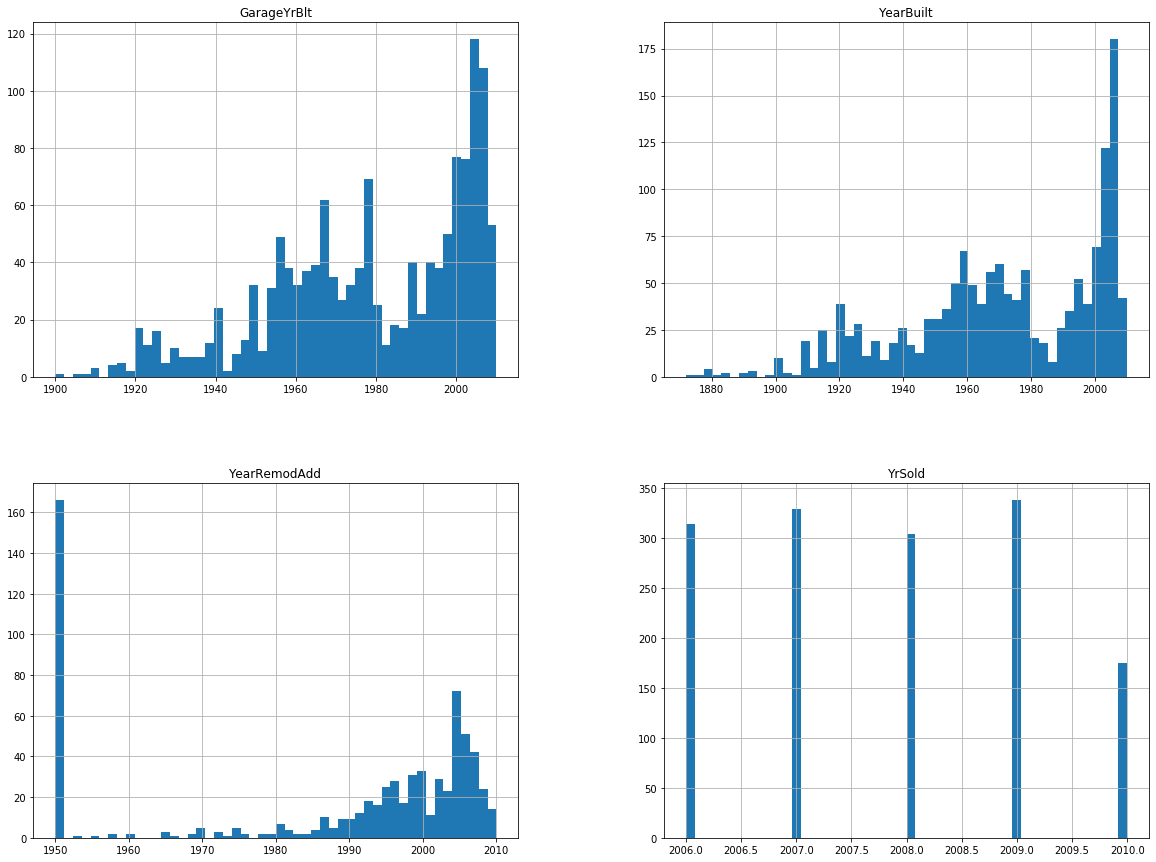

In [841]:
import matplotlib.pyplot as plt

X_scale_rmdnan[["GarageYrBlt", "YearBuilt", "YearRemodAdd", "YrSold"]].hist(bins=50, figsize=(20,15))
plt.show()

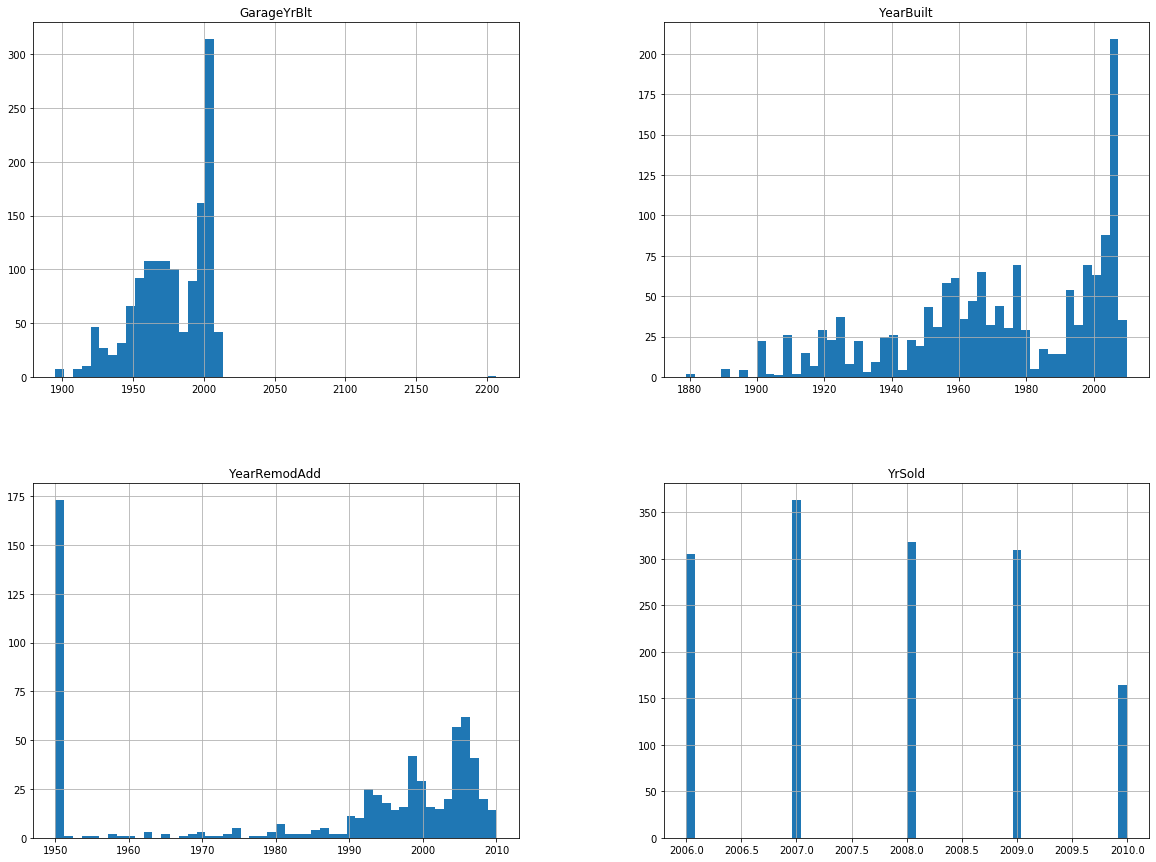

In [840]:
import matplotlib.pyplot as plt

X_comp_scale_rmdnan[["GarageYrBlt", "YearBuilt", "YearRemodAdd", "YrSold"]].hist(bins=50, figsize=(20,15))
plt.show()

Na pierwszy rzut oka możemy zauważyć dwie dziwne kwestie:
1. W zestawie testowym istnieje przynajmniej jedna bardzo wysoka wartość GarageYrBlt (około 2200)
2. W obydwu zestawach wyjątkowo duża część rozkładu YearRemodAdd skupia się około 1950.

#### 7.2.1 GarageYtBlt powyżej 2200
Przyjrzyjmy się najpierw garażowi z 2200 ;)

In [738]:
X_comp_scale_rmdnan[X_comp_scale_rmdnan.GarageYrBlt > 2020][["GarageYrBlt", "YearBuilt", "YearRemodAdd",  "GarageCars", "GarageArea", "GarageCond", "GarageFinish", "GarageQual"]]

,GarageYrBlt,YearBuilt,YearRemodAdd,GarageCars,GarageArea,GarageCond,GarageFinish,GarageQual
1132,2207.0,2006.0,2007.0,2.0,502.0,3,2,3


In [743]:
print(X_comp_scale_rmdnan[X_comp_scale_rmdnan.YearBuilt == 2006]["GarageYrBlt"].median())
print(X_scale_rmdnan[X_scale_rmdnan.YearBuilt == 2006]["GarageYrBlt"].median())

2006.0
2006.0


Po pierwsze - garaż w ogóle isnieje. Możemy to rozpoznać po wartościach innych cech powiązanych z garażami (GarageCars itp.). Po drugie - w obydwu zestawach danych dla domów wybudowanych w 2006 wartość GarageYtBlt wynosiła najczęściej 2006. Podstawmy taką wartość i wyślijmy rozwiązanie.

In [762]:
X_comp_scale_2207 = X_comp_scale_rmdnan.copy()
X_comp_scale_2207.loc[X_comp_scale_2207.GarageYrBlt == 2207, "GarageYrBlt"] = 2006

xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
xgbmodel.fit(X_scale_rmdnan[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_2207 = xgbmodel.predict(X_comp_scale_2207[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
print(predict_scale_2207[1132])
print(predict_scale_rmdnan[1132])
solution_scale_2207 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_2207, name="SalePrice")], axis=1)
solution_scale_2207.to_csv('solution13.csv', index=False)

247431.78
254745.9


Po wysłaniu wyniku na zawody kaggle zwrócony wynik był... minimalnie gorszy, od poprzedniego. Pozostawimy decyzję o zastosowaniu tej zmiany na później.

#### 7.2.2 Przebudowy z roku 1950

Spróbujmy uzupełnić wartości z 1950 poprzez odpowiedni model - podobnie do uzupełniania LotFrontage.

In [792]:
all_remod = pd.concat( [pd.concat([df["Id"], X_scale_rmdnan], axis=1), pd.concat([pd.read_csv("test.csv")["Id"], X_comp_scale_rmdnan], axis=1)], axis=0, sort=True )
all_remod_1950 = all_remod[all_remod.YearRemodAdd == 1950]
all_remod_notnull = all_remod[all_remod.YearRemodAdd > 1950]
X_train_all_remod = all_remod_notnull.drop(columns="YearRemodAdd")
X_test_all_remod = all_remod_1950.drop(columns="YearRemodAdd")

y_train_all_remod = all_remod_notnull["YearRemodAdd"]

mi_all_remod = mutual_info_regression(X_train_all_remod.drop(columns="GarageYrBlt").fillna(0), y_train_all_remod, random_state=0)
mi_all_remod_with_columns = pd.Series(mi_all_remod, name="Mutual Information", index=X_train_all_remod.drop(columns="GarageYrBlt").columns)
mi_all_remod_with_columns.sort_values(ascending=False)[:20]

YearBuilt                1.241055
SaleType_New             0.162625
SaleCondition_Partial    0.160496
KitchenQual              0.140675
BsmtQual                 0.119705
ExterQual                0.116063
SaleType_WD              0.110754
MasVnrArea               0.107705
BsmtFinSF1               0.106693
BsmtUnfSF                0.104118
SaleCondition_Normal     0.099510
HeatingQC                0.092068
MSSubClass               0.091686
FireplaceQu              0.090391
OverallCond              0.087591
LotArea                  0.086730
Foundation_PConc         0.073589
LotFrontage              0.073506
YrSold                   0.071179
OverallQual              0.067393
Name: Mutual Information, dtype: float64

In [799]:
good_columns_all_remod = np.append(mi_all_remod_with_columns.sort_values(ascending=False)[:15].index.values, "GarageYrBlt")

xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
xgbmodel.fit(X_train_all_remod, y_train_all_remod)
pred_all_remod = xgbmodel.predict(X_test_all_remod)
pred_all_remod[:30]

array([1987.6686, 1993.4346, 1994.4596, 1980.3292, 1989.5715, 1978.0336,
       1988.3627, 1985.3328, 1991.2599, 1980.7318, 1985.4072, 1994.1892,
       1986.4246, 1999.2761, 1987.5428, 1984.2817, 1996.6394, 1987.0459,
       1987.1736, 1994.2798, 1979.364 , 1993.571 , 1996.307 , 1985.8899,
       1989.216 , 1984.8116, 1986.3027, 1997.6508, 1988.8147, 1987.9069],
      dtype=float32)

Niestety wyniki nie wyglądają na wiarygodne. Teraz łatwo domyśleć się dlaczego - dane do wytrenowania modelu zawierały przecież wyłącznie budynki przebudowane po 1950r. Przegląd kolumny YearBuilt pokazuje, że zestaw zawiera także domy wybudowane sporo przed 1950. Musimy w takej sytuacji przyjąć inną strategię. Przyjrzyjmy się zależności YearBuilt do YearRemodAdd.

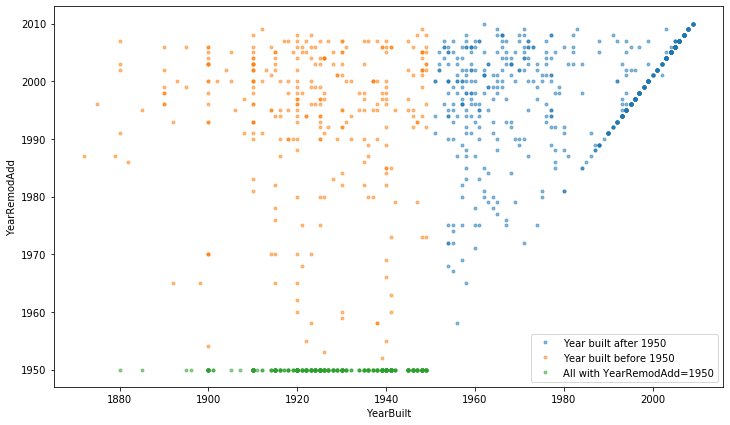

In [814]:
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt")
plt.ylabel("YearRemodAdd")
plt.plot(all_remod_notnull[all_remod_notnull.YearBuilt>1950]["YearBuilt"], all_remod_notnull[all_remod_notnull.YearBuilt>1950]["YearRemodAdd"], '.', alpha=0.5, label = 'Year built after 1950')
plt.plot(all_remod_notnull[all_remod_notnull.YearBuilt<1950]["YearBuilt"], all_remod_notnull[all_remod_notnull.YearBuilt<1950]["YearRemodAdd"],'.', alpha=0.5, label = 'Year built before 1950')
plt.plot(all_remod_1950["YearBuilt"], all_remod_1950["YearRemodAdd"],'.', alpha=0.5, label = 'All with YearRemodAdd=1950')
plt.legend()

Lata przebudowy są dosyć mocno porozrzucane pomiędzy YearBuild, a 2010. W takiej sytuacji, dodatkowo zakładając, że wszystkie wartości YearRemodAdd==1950 to przebudowy z tego roku lub starsze spróbujemy podstawić dla nich wartość (1950 + YearBuilt)/2. Sprawdzimy wynik dla dwóch najlepszych strategi podstawiania wartości GarageYrBlt. Zaczniemy od pozostawienia wartości null, następnie wpisanie wartości YearBuilt:

In [1077]:
X_scale_rmdhalf = X_scale_rmdnan.copy()
X_scale_rmdhalf.loc[X_scale_rmdhalf.YearRemodAdd == 1950, "YearRemodAdd"] = (1950 + X_scale_rmdhalf.YearBuilt)/2
xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
print(cross_val_score(xgbmodel, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

0.8930303481851978


Wynik na danych train nieco się poprawił. Sprawdźmy w serwisie kaggle dane testowe:

In [838]:
X_comp_scale_rmdhalf = X_comp_scale_rmdnan.copy()
X_comp_scale_rmdhalf.loc[X_comp_scale_rmdhalf.YearRemodAdd == 1950, "YearRemodAdd"] = (1950 - X_comp_scale_rmdhalf.YearBuilt)/2

xgbmodel.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_rmdhalf = xgbmodel.predict(X_comp_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_rmdhalf

array([123100.1 , 162883.2 , 180433.75, ..., 167912.  , 122493.56,
       217932.9 ], dtype=float32)

In [839]:
solution_scale_rmdhalf = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_rmdhalf, name="SalePrice")], axis=1)
solution_scale_rmdhalf.to_csv('solution14.csv', index=False)

Osiągnęliśmy najlepszy wynik - 0.13544. Niewielka poprawa z 0.13561.

Teraz sprawdźmy podobną strategię dla GarageYrBlt = YearBuilt:

In [892]:
X_scale_rmdhalf2 = X_scale_rmdnan2.copy()
X_scale_rmdhalf2.loc[X_scale_rmdhalf2.YearRemodAdd == 1950, "YearRemodAdd"] =1950 - (1950 - X_scale_rmdhalf2.YearBuilt)/2
xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
print(cross_val_score(xgbmodel, X_scale_rmdhalf2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())

X_comp_scale_rmdhalf2 = X_comp_scale_rmdnan2.copy()
X_comp_scale_rmdhalf2.loc[X_comp_scale_rmdhalf2.YearRemodAdd == 1950, "YearRemodAdd"] = (1950 - X_comp_scale_rmdhalf2.YearBuilt)/2

xgbmodel.fit(X_scale_rmdhalf2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_scale_rmdhalf2 = xgbmodel.predict(X_comp_scale_rmdhalf2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
predict_scale_rmdhalf2

solution_scale_rmdhalf2 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_scale_rmdhalf2, name="SalePrice")], axis=1)
solution_scale_rmdhalf2.to_csv('solution18.csv', index=False)

0.8938994358242486


Tym razem wynik... nieco pogorszył się - 0.13573. W takim sytuacji na razie trudno określić, która strategia jest optymalna. Różne kombinacje potrafią dawać odmienne rezultaty od zastosowania ich pojedynczo. W każdym razie dotychczasowy najlepszy model to połączenie:
- skali liczbowej zamiast cech kategorialnych
- 103 cechy z najwyższą informacją wzajemną
- pozostawienie wartości null w kolumnie GarageYrBlt
- w kolumnie YearRemodAdd postawienie wartości (1950 + YearBuilt)/2 w próbach z 1950.
- pozostawienie w zestawie test.csv wartości 2207 w GarageYrBlt

### 7.3 Tworzenie cech

na końcu spróbujemy utworzyć cechy:
- BuiltSaleDiff - czas pomiędzy wybudowaniem, a sprzedażą
- RemodSaleDiff -  czas pomiędzy przebudową, a sprzedażą
- GrgBltSaleDiff czas pomiędzy budową garażu, a sprzedaż

In [865]:
X_year_eda = X_scale_rmdhalf.copy()
X_year_eda["BuiltSaleDiff"] = X_year_eda.YrSold - X_year_eda.YearBuilt
X_year_eda["RemodSaleDiff"] = X_year_eda.YrSold - X_year_eda.YearRemodAdd
X_year_eda["GrgBltSaleDiff"] = X_year_eda.YrSold - X_year_eda.GarageYrBlt

xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], ["BuiltSaleDiff", "GrgBltSaleDiff","RemodSaleDiff"])
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], ["GrgBltSaleDiff","RemodSaleDiff"])
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], ["BuiltSaleDiff", "RemodSaleDiff"])
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], ["BuiltSaleDiff", "GrgBltSaleDiff"])
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], "BuiltSaleDiff")
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], "RemodSaleDiff")
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())
print(cross_val_score(xgbmodel,
                      X_year_eda[
                          np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], "GrgBltSaleDiff")
                      ].sort_index(), y, cv=15, n_jobs=-1).mean())

0.892808585988159
0.8947694306527934
0.8933635349272163
0.8924234988552894
0.8914437501215173
0.8961895695416281
0.895433883607691
0.8911715517631466


Największą poprawę otrzymaliśmy przy dodaniu cechy RemodSaleDiff. Próbowałem dodatkowo różnych kombinacji z usuwaniem bazowych cech (np. dodanie RemodSaleDiff z jednoczesnym usunięciem YearRemodAdd), jednak nie dawało to zadowalającego rezultatu. Sprawdźmy wyniki w serwisie Kaggle:

In [866]:
columns_year_eda = np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:103], "RemodSaleDiff")

X_comp_year_eda = X_comp_scale_rmdhalf.copy()
X_comp_year_eda["RemodSaleDiff"] = X_comp_year_eda.YrSold - X_comp_year_eda.YearRemodAdd

xgbmodel.fit(X_year_eda[columns_year_eda], y)
predict_year_eda = xgbmodel.predict(X_comp_year_eda[columns_year_eda])
predict_year_eda

array([122641.97, 164312.66, 178590.19, ..., 166503.39, 122202.99,
       217193.56], dtype=float32)

In [867]:
solution_year_eda = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_year_eda, name="SalePrice")], axis=1)
solution_year_eda.to_csv('solution15.csv', index=False)

Wynik konkursowy zauważalnie pogorszył się - z 0.13544 na 0.13715. Warto zwrócić uwagę na ogólną zasadę - modele czasami gorzej działają przy nadmiarowych, silnie skorelowanych cechach.

Dodatkowo rozrzut cechy YrSold jest dość mały (2006-2010), więc - szczególnie dla starszych domów - wpływa tylko w ograniczonym stopniu na liczbę lat pomiędzy sprzedażą, a innym wydarzeniem. Dużo istotniejsze może być zastosowanie bezpośrednio roku sprzedaży - tym bardziej, że oscyluje koło globalnego kryzysu ekonomicznego powiązanego z kryzysem mieszkaniowym.

## 8. Strojenie XGBoost regressora 8)

Poszukajmy siatką parametrów z najlepszą walidacją krzyżową dla dotychczasowego modelu z minimalnym wynikiem Kaggle:

In [895]:
xgbmodel = XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror")
param_grid = [{'xgbregressor__learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2, 1.0, 10.0],
             'xgbregressor__n_estimators': [25, 50, 100, 150, 200, 300],
             'xgbregressor__max_depth': [2,3,4],
              'xgbregressor__base_score': [0.3,0.5,1],
              'xgbregressor__gamma':[0,1,2]}]

gs = GridSearchCV(estimator = xgbmodel,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print(cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_xgb_rmdhalf = clf.predict(X_comp_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
xgb_solution_rmdhalf = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_rmdhalf, name="SalePrice")], axis=1)
xgb_solution_rmdhalf.to_csv('solution19.csv', index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


gs.best_score_ -670132723.2229996
gs.best_params_ {'xgbregressor__base_score': 0.3, 'xgbregressor__gamma': 0, 'xgbregressor__learning_rate': 0.001, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 25}
0.8930303481851978


Model po strojeniu dał identyczny rezultat względem poprzedniego najlepszego - 0.8930303481851978 dla walidacji krzyżowej i 0.13544 dla test.csv w serwisie Kaggle. Nie jestem tego pewien, jednak może być to powiązane z niewielką liczbą danych.

## 9. Transformacja rozkładu cech

Najpierw sprawdzimy wynik dla naiwnego podejścia - spróbujemy zastosować narzędzie PowerTransformer na każdej kolumnie poprzez wpisanie go do pipe:

In [898]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.01, 0.05, 0.1, 0.2],
             'xgbregressor__n_estimators': [25, 50, 100],
             'xgbregressor__max_depth': [2,3]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print(cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]].sort_index(), y, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]], y)
predict_xgb_pwrtran = clf.predict(X_comp_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:103]])
xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
xgb_solution_pwrtran.to_csv('solution21.csv', index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -637246143.0812842
gs.best_params_ {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 100}
0.8983565194321285


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Udało się jeszcze trochę poprawić wynik - z 0.13544 na 0.13525.

**Warto spróbować zastosować transformację tylko dla części cech - np. wyłącznie dla kategorialnych, wyłącznie dla numerycznych itp.**

## 10. Zmiana liczby dobranych cech z jednoczesnym strojeniem parametrycznym

Przypomnijmy - zmiana wyniku walidacji krzyżowej nie musi odzwierciedlać zmiany w danych konkursowych. Spróbujmy dla pewnych liczb cech (dobranych za pomocą najwyższego wyniku informacji wzajemnej) dostroić model XGB i sprawdzić punktację w serwisie Kaggle:

In [921]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.01, 0.05, 0.1, 0.2],
             'xgbregressor__n_estimators': [25, 50, 100, 200],
             'xgbregressor__max_depth': [2,3],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

for features_number in [70,80,90,100,110,120,130,140,150,160]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
    file_name = 'solution22_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -662338784.4189374
gs.best_params_ {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 0.75}
cross_val_score for 70 number: 0.8958992821163508


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -656497085.839416
gs.best_params_ {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 0.75}
cross_val_score for 80 number: 0.8962400410206232


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -648771380.2242146
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 90 number: 0.8968246999216248


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -640801795.1139141
gs.best_params_ {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 100 number: 0.8975660553989212


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -644334433.0203487
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 110 number: 0.8968141783975094


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -639437509.4256408
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 120 number: 0.8978203250855208


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -634052048.551777
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 130 number: 0.8994071678450729


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -629295524.1135465
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 0.75}
cross_val_score for 140 number: 0.9003315261998969


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -621768640.8661957
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 150 number: 0.901206634432574


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -630514407.9187335
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
cross_val_score for 160 number: 0.8991874042765173


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Wynik dla 103 cech: 0.8983565194321285

In [922]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.05, 0.1, 0.2],
             'xgbregressor__n_estimators': [150,200, 250, 300],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

for features_number in [110,120,130,140,150,160, 170]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
    file_name = 'solution23_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -625694735.7485273
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
cross_val_score for 110 number: 0.8998059897231939


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -613198375.1687341
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
cross_val_score for 120 number: 0.902091328400854


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -617715185.3245859
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
cross_val_score for 130 number: 0.9011214496094344


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -615819170.1835468
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 0.75}
cross_val_score for 140 number: 0.9027092205098668


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -617712043.411143
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
cross_val_score for 150 number: 0.901889618560365


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -621550477.9639032
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
cross_val_score for 160 number: 0.900804605788713


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -619470694.1137035
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}
cross_val_score for 170 number: 0.9010308114078905


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [923]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.05, 0.1, 0.2],
             'xgbregressor__n_estimators': [300, 350, 400],
             'xgbregressor__max_depth': [2,3,4],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

for features_number in [110,120,130,140,150,160, 170]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
    file_name = 'solution24_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -615350690.113858
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 1.0}
cross_val_score for 110 number: 0.9014983824199155


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -599650725.1260139
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 1.0}
cross_val_score for 120 number: 0.9042521954243853


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -608887088.4554236
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 1.0}
cross_val_score for 130 number: 0.902615536626825


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -606628091.6303087
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 0.5}
cross_val_score for 140 number: 0.9049266463256955


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -611229004.6904607
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 0.5}
cross_val_score for 150 number: 0.9037165585112698


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -609689811.1569402
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 0.75}
cross_val_score for 160 number: 0.903551696058301


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -611768940.7097738
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 1.0}
cross_val_score for 170 number: 0.9022632190540143


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [953]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

# for features_number in [110,120,130,140]:
for features_number in [140]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
    file_name = 'solution25_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -594797475.2610892
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 140 number: 0.9054123491757046


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [927]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.05, 0.075, 0.1],
             'xgbregressor__n_estimators': [500, 550, 600, 650, 700, 750, 800],
             'xgbregressor__max_depth': [2,3,4,5,6],
              'xgbregressor__subsample': [0.4, 0.5, 0.625, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

for features_number in [140]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
    file_name = 'solution26_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -580171433.5699799
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 800, 'xgbregressor__subsample': 0.5}
cross_val_score for 140 number: 0.90774261364762


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [960]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

for features_number in [137, 138, 139,141,142,143]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y)
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_xgb_pwrtran, name="SalePrice")], axis=1)
    file_name = 'solution27_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -594640745.6914996
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 137 number: 0.9064318803283113


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -594806545.2487993
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 138 number: 0.9064055063684727


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -594797475.2610892
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 139 number: 0.9054123491757046


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -598800709.3576328
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 141 number: 0.9048188467666344


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -593757460.429124
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 142 number: 0.9057923543554767


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar

gs.best_score_ -594310307.7917831
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score for 143 number: 0.9056184193532231


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Najlepszy wynik konkursowy otrzymaliśmy dla 142 cech i parametrów:
learning_rate: 0.025, max_depth: 4, n_estimators: 550, subsample: 0.5

## 11. Pozbycie się części cech z najlepszego modelu/dodanie nieużywanych

W każdej iteracji będziemy wyliczali wynik walidacji krzyżowej najlepszego dotychczasowego modelu bez jednej kolumny:

In [1091]:
features_number = 142
best_score = 0.9057923543554767
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]:
    score = cross_val_score(best_model, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index().drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny GarageType_Attchd poprawa o: 4.8010169840906336e-05
Bez kolumny CentralAir poprawa o: 6.690899375128012e-05
Bez kolumny Electrical_SBrkr poprawa o: 0.0006206033227391661
Bez kolumny RoofStyle_Gable poprawa o: 0.00016292607246959356
Bez kolumny Electrical_FuseA poprawa o: 2.9139867998129176e-05
Bez kolumny Exterior2nd_MetalSd poprawa o: 1.864303371912346e-05
Bez kolumny Neighborhood_SawyerW poprawa o: 6.401361592744959e-05
Bez kolumny BsmtHalfBath poprawa o: 5.3883346015526357e-05
Bez kolumny Exterior1st_CemntBd poprawa o: 0.00021415690934145637
Bez kolumny Exterior2nd_Brk Cmn poprawa o: 8.353930539650722e-05
Bez kolumny Street poprawa o: 8.046017776308645e-05
Bez kolumny MiscFeature_Shed poprawa o: 4.687754765797525e-05
Bez kolumny Alley_Grvl poprawa o: 0.000531708178026502
Bez kolumny Heating_GasA poprawa o: 0.00011703973113152966
Bez kolumny Exterior2nd_Stucco poprawa o: 0.00023298826127637895


Poniższy kod w każdej iteracji wyliczy walidację krzyżową najlepszego modelu z dodatkiem jednej nieużywanej kolumny. Wyświetlimy tylko wyniki lepsze od wcześniejszego modelu:

In [1092]:
features_number = 142
best_score = 0.9057923543554767

for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:]:
    columns = np.append(mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].values, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną HouseStyle_1.5Unf poprawa o 5.7883285040638555e-06
Z dodatkową kolumną HouseStyle_2.5Unf poprawa o 2.0877857323409188e-05
Z dodatkową kolumną MasVnrType_BrkCmn poprawa o 9.001732989788458e-06
Z dodatkową kolumną SaleType_Oth poprawa o 0.00010124289447055457
Z dodatkową kolumną Exterior1st_WdShing poprawa o 5.9447216352870313e-05
Z dodatkową kolumną Heating_OthW poprawa o 5.32782981588209e-06
Z dodatkową kolumną Condition1_PosA poprawa o 4.4929478978161796e-05
Z dodatkową kolumną Condition2_Feedr poprawa o 7.663435400817598e-06
Z dodatkową kolumną Alley_Pave poprawa o 1.543636959433492e-05
Z dodatkową kolumną Exterior2nd_Other poprawa o 1.132983173945945e-08


Wygląda na to, że warto skupić się na temacie. Punkt wymaga jednak dalszej analizy - można ją rozpocząć np. poprzez wykonanie tego samego algorytmu, jednak dla zestawu 142 "najlepszych" cech z dodaniem/usunięciem tej, która najlepiej poprawiła wynik.

In [1096]:
best_score = 0.9057923543554767 + 0.0006206033227391661
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop('Electrical_SBrkr')

for drop_column in best_columns:
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Exterior1st_VinylSd poprawa o: 8.75210687569794e-05
Bez kolumny Exterior2nd_Plywood poprawa o: 1.5188205162441903e-05
Bez kolumny Neighborhood_Gilbert poprawa o: 7.003996996479689e-05
Bez kolumny Exterior2nd_MetalSd poprawa o: 8.597852222569369e-05
Bez kolumny Neighborhood_MeadowV poprawa o: 0.0003632008260537889
Bez kolumny Exterior1st_CemntBd poprawa o: 0.00030843062848595615
Bez kolumny GarageType_BuiltIn poprawa o: 0.00012098024381590466
Bez kolumny SaleType_COD poprawa o: 0.00032933396630518974
Bez kolumny Exterior2nd_Stucco poprawa o: 8.748134770575344e-05


In [1097]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:]:
    columns = np.append(best_columns.values, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną HouseStyle_1.5Unf poprawa o 2.7957746191353827e-05
Z dodatkową kolumną HouseStyle_2.5Unf poprawa o 1.160804735833576e-05
Z dodatkową kolumną MiscFeature_TenC poprawa o 6.422993498633733e-05
Z dodatkową kolumną SaleType_Oth poprawa o 3.934030333729854e-05
Z dodatkową kolumną SaleType_ConLD poprawa o 2.7246966254557137e-05
Z dodatkową kolumną Heating_GasW poprawa o 5.9866285562648613e-05
Z dodatkową kolumną Heating_OthW poprawa o 5.32782981588209e-06
Z dodatkową kolumną Condition1_PosA poprawa o 7.682323072988329e-05
Z dodatkową kolumną Exterior2nd_Other poprawa o 1.1329831850481753e-08


Najlepszy wynik osiągnęliśmy po usunięciu kolumny Neighborhood_MeadowV. Przejdźmy przez algorytm jeszcze raz:

In [1098]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(['Electrical_SBrkr', 'Neighborhood_MeadowV'])

for drop_column in best_columns:
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Exterior1st_VinylSd poprawa o: 1.5056759141041098e-05
Bez kolumny Neighborhood_Gilbert poprawa o: 4.990967285645187e-05
Bez kolumny Exterior1st_CemntBd poprawa o: 0.00015814853688600472
Bez kolumny GarageType_BuiltIn poprawa o: 4.2861575951569364e-05
Bez kolumny SaleType_COD poprawa o: 0.00011276631860424047
Bez kolumny Street poprawa o: 7.788171997968885e-05
Bez kolumny LotConfig_Inside poprawa o: 5.205656216089594e-07
Bez kolumny Exterior2nd_Stucco poprawa o: 4.520874120428342e-05


In [1099]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:]:
    columns = np.append(best_columns.values, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną Exterior2nd_AsbShng poprawa o 6.465857922055562e-05
Z dodatkową kolumną HouseStyle_1.5Unf poprawa o 2.733371620378122e-06
Z dodatkową kolumną HouseStyle_2.5Unf poprawa o 0.00012544380425671964
Z dodatkową kolumną MiscFeature_TenC poprawa o 6.422993498633733e-05
Z dodatkową kolumną SaleType_Oth poprawa o 3.956182444631029e-05
Z dodatkową kolumną Foundation_Stone poprawa o 1.4403104353633012e-05
Z dodatkową kolumną SaleType_ConLD poprawa o 6.602960310397865e-05
Z dodatkową kolumną Heating_Wall poprawa o 2.761839103171404e-05
Z dodatkową kolumną Heating_GasW poprawa o 5.975902855137605e-05
Z dodatkową kolumną Heating_OthW poprawa o 5.327829815771068e-06
Z dodatkową kolumną Condition1_PosA poprawa o 2.5122738523286614e-05
Z dodatkową kolumną BldgType_TwnhsE poprawa o 1.0153817850966362e-06
Z dodatkową kolumną Exterior2nd_Other poprawa o 1.132983173945945e-08


Najlepszy wynik osiągnęliśmy po usunięciu kolumny Exterior1st_CemntBd. Przejdźmy przez algorytm ponownie:

In [1100]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd'])

for drop_column in best_columns:
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Exterior2nd_VinylSd poprawa o: 2.614485318697124e-05
Bez kolumny Exterior1st_VinylSd poprawa o: 0.00017748440042564262
Bez kolumny Electrical_FuseA poprawa o: 0.00010041640954716602
Bez kolumny Neighborhood_Gilbert poprawa o: 6.315149907309969e-05
Bez kolumny SaleType_COD poprawa o: 0.00011476739882243514
Bez kolumny Exterior1st_Plywood poprawa o: 4.823846777612939e-05
Bez kolumny Street poprawa o: 7.603840098890924e-05


In [1101]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:]:
    columns = np.append(best_columns.values, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną HouseStyle_2.5Unf poprawa o 8.619526318087711e-05
Z dodatkową kolumną MiscFeature_TenC poprawa o 6.994024391848708e-05
Z dodatkową kolumną MasVnrType_BrkCmn poprawa o 6.305190602151622e-05
Z dodatkową kolumną MSZoning_RH poprawa o 2.3167751073249754e-05
Z dodatkową kolumną SaleType_CWD poprawa o 2.3859706201889708e-05
Z dodatkową kolumną Foundation_Stone poprawa o 4.519250009882292e-06
Z dodatkową kolumną SaleType_ConLD poprawa o 0.00010484129321031155
Z dodatkową kolumną Heating_Wall poprawa o 3.056798158174168e-05
Z dodatkową kolumną Heating_GasW poprawa o 5.4347721909708824e-05
Z dodatkową kolumną Heating_OthW poprawa o 2.450550357635528e-06
Z dodatkową kolumną Condition1_PosA poprawa o 3.9861237164151575e-05
Z dodatkową kolumną BldgType_TwnhsE poprawa o 7.465247201587921e-05
Z dodatkową kolumną Exterior2nd_ImStucc poprawa o 1.2261254924816889e-05
Z dodatkową kolumną Exterior2nd_Other poprawa o 1.5220756877099006e-08


Najlepszy wynik osiągnęliśmy po usunięciu kolumny Exterior1st_VinylSd. Przejdźmy przez algorytm ponownie:

In [1102]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd'])

for drop_column in best_columns:
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Neighborhood_Gilbert poprawa o: 3.513039104729998e-05
Bez kolumny Exterior2nd_MetalSd poprawa o: 8.80299738852397e-05
Bez kolumny Exterior1st_MetalSd poprawa o: 5.73223087408925e-05
Bez kolumny Heating_GasA poprawa o: 0.0002029278315702765


In [1103]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:]:
    columns = np.append(best_columns.values, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną HouseStyle_2.5Unf poprawa o 0.0001569060926306376
Z dodatkową kolumną RoofStyle_Gambrel poprawa o 5.050771937686882e-05
Z dodatkową kolumną MiscFeature_TenC poprawa o 6.916520200928034e-05
Z dodatkową kolumną MSZoning_RH poprawa o 0.0003525340794944265
Z dodatkową kolumną Foundation_Stone poprawa o 0.00011473741450773733
Z dodatkową kolumną Foundation_Wood poprawa o 6.6193934122882325e-06
Z dodatkową kolumną SaleType_ConLD poprawa o 0.0001124138769494909
Z dodatkową kolumną Heating_Wall poprawa o 3.5551587047155664e-05
Z dodatkową kolumną Exterior2nd_Other poprawa o 1.1099949959181288e-08
Z dodatkową kolumną RoofMatl_WdShake poprawa o 6.452693445679891e-06
Z dodatkową kolumną MiscVal poprawa o 9.991677112974884e-05


Najlepszy wynik osiągnęliśmy po usunięciu kolumny Heating_GasA. Przejdźmy przez algorytm ponownie:

In [1117]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA']
columns_added = ['MSZoning_RH']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Condition2_Norm poprawa o: 0.0002805545355918371
Bez kolumny Exterior2nd_Stucco poprawa o: 0.00016701740547730992


In [1119]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną GarageType_Basment poprawa o 0.00011286314257386021
Z dodatkową kolumną Exterior2nd_ImStucc poprawa o 1.3832881029185451e-05
Z dodatkową kolumną MiscVal poprawa o 9.628758332325127e-06


Najlepszy wynik osiągnęliśmy usuwając kolumnę Condition2_Norm. Przejdźmy przez algorytm ponownie:

In [1120]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Foundation_Slab poprawa o: 7.951554612195544e-06
Bez kolumny HouseStyle_SFoyer poprawa o: 2.322276806077106e-06


In [1121]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną RoofStyle_Gambrel poprawa o 1.3812060523088476e-06
Z dodatkową kolumną SaleType_ConLD poprawa o 1.3505158760196423e-05
Z dodatkową kolumną Condition1_PosA poprawa o 6.649193394725472e-05
Z dodatkową kolumną Exterior2nd_ImStucc poprawa o 4.147594252734699e-05


Najlepszy wynik osiągnęliśmy z dodatkową kolumną Condition1_PosA. Przejdźmy przez algorytm ponownie:

In [1122]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Foundation_Slab poprawa o: 7.951554612084522e-06


In [1123]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną RoofStyle_Gambrel poprawa o 1.1295868163951894e-05
Z dodatkową kolumną SaleType_ConLw poprawa o 5.433140232347089e-05
Z dodatkową kolumną Exterior2nd_ImStucc poprawa o 5.351434266509525e-05
Z dodatkową kolumną MiscVal poprawa o 9.710869274925926e-06


Najlepszy wynik osiągnęliśmy po dodaniu kolumny SaleType_ConLw. Przejdźmy przez algorytm ponownie:

In [1124]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Foundation_Slab poprawa o: 7.951554612195544e-06
Bez kolumny HouseStyle_SFoyer poprawa o: 4.273355687089975e-06


In [1125]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną RoofStyle_Gambrel poprawa o 6.630246951733199e-05
Z dodatkową kolumną BldgType_Twnhs poprawa o 3.116248186052495e-05
Z dodatkową kolumną Exterior2nd_ImStucc poprawa o 6.157786326843606e-05
Z dodatkową kolumną Exterior1st_BrkComm poprawa o 1.3435834039010608e-05
Z dodatkową kolumną MiscVal poprawa o 5.639289358716493e-05


Najlepszy wynik osiągnęliśmy z dodatkową kolumną RoofStyle_Gambrel. Przejdźmy przez algorytm ponownie:

In [1127]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny Foundation_Slab poprawa o: 7.951554612084522e-06
Bez kolumny HouseStyle_SFoyer poprawa o: 3.269237318692664e-05


In [1128]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną Exterior2nd_ImStucc poprawa o 8.43891149614473e-05
Z dodatkową kolumną RoofMatl_WdShake poprawa o 5.160150283056719e-05
Z dodatkową kolumną MiscVal poprawa o 2.1425180243395126e-05


Najlepszy wynik osiągnęliśmy z dodatkową kolumną Exterior2nd_ImStucc. Przejdźmy przez algorytm ponownie:

In [1152]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199 + 0.0000843891149614473
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel', 'Exterior2nd_ImStucc']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny HouseStyle_SFoyer poprawa o: 2.3384113396751616e-06


In [1153]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną SaleType_CWD poprawa o 3.851951179134616e-07
Z dodatkową kolumną SaleType_ConLD poprawa o 0.0001362685448027534
Z dodatkową kolumną RoofMatl_WdShake poprawa o 5.160150283045617e-05


Najlepszy wynik osiągnęliśmy z dodatkową kolumną SaleType_ConLD. Przejdźmy przez algorytm ponownie:

In [1156]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199 + 0.0000843891149614473 + 0.0001362685448027534
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel', 'Exterior2nd_ImStucc', 'SaleType_ConLD']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny HouseStyle_SFoyer poprawa o: 2.3222768061881283e-06


In [1157]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną SaleType_CWD poprawa o 3.851951182465285e-07
Z dodatkową kolumną RoofMatl_WdShake poprawa o 5.1601502830678214e-05
Z dodatkową kolumną MiscVal poprawa o 5.9128560530141705e-05


Najlepszy wynik osiągnęliśmy z dodatkową kolumną "MiscVal". Przejdźmy przez algorytm ponownie:

In [1158]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199 + 0.0000843891149614473 + 0.0001362685448027534 + 0.000059128560530141705
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel', 'Exterior2nd_ImStucc', 'SaleType_ConLD', 'MiscVal']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny HouseStyle_SFoyer poprawa o: 2.3222768059660837e-06


In [1159]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Z dodatkową kolumną RoofMatl_WdShake poprawa o 9.554164633129858e-05


Najlepszy wynik osiągnęliśmy z dodatkową kolumną RoofMatl_WdShake. Przejdźmy przez algorytm ponownie:

In [1160]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199 + 0.0000843891149614473 + 0.0001362685448027534 + 0.000059128560530141705 + 0.00009554164633129858
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel', 'Exterior2nd_ImStucc', 'SaleType_ConLD', 'MiscVal', 'RoofMatl_WdShake']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

Bez kolumny HouseStyle_SFoyer poprawa o: 2.322276806077106e-06


In [1161]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Osiągnęliśmy lepszy wynik po usunięciu kolumny HouseStyle_SFoyer. Przejdźmy przez algorytm jeszcze raz:

In [1162]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199 + 0.0000843891149614473 + 0.0001362685448027534 + 0.000059128560530141705 + 0.00009554164633129858 + 0.000002322276806077106
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm', 'HouseStyle_SFoyer']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel', 'Exterior2nd_ImStucc', 'SaleType_ConLD', 'MiscVal', 'RoofMatl_WdShake']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped):
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

In [1163]:
for column_to_add in mi_scale_lot_with_columns.sort_values(ascending=False).index[features_number:].drop(columns_added):
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

Nie udało się już poprawić wyniku. Spróbujmy jeszcze sprawdzić czy przy obecnym zestawie cech opłaca się usunąć jedną z wcześniej dodanych cech, lub dodać jedną z wcześniej usuniętych:

In [1164]:
best_score = 0.9057923543554767 + 0.0006206033227391661 + 0.0003632008260537889 + 0.00015814853688600472 + 0.00017748440042564262 + 0.0003525340794944265 + 0.0002805545355918371 + 0.00006649193394725472 + 0.00005433140232347089 + 0.00006630246951733199 + 0.0000843891149614473 + 0.0001362685448027534 + 0.000059128560530141705 + 0.00009554164633129858 + 0.000002322276806077106
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
features_number = 142
columns_dropped = ['Electrical_SBrkr', 'Neighborhood_MeadowV', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Heating_GasA', 'Condition2_Norm', 'HouseStyle_SFoyer']
columns_added = ['MSZoning_RH', 'Condition1_PosA', 'SaleType_ConLw', 'RoofStyle_Gambrel', 'Exterior2nd_ImStucc', 'SaleType_ConLD', 'MiscVal', 'RoofMatl_WdShake']
best_columns = mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number].drop(columns_dropped).to_list() + columns_added

for drop_column in columns_added:
    score = cross_val_score(best_model, X_scale_rmdhalf[best_columns].drop(columns=drop_column), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Bez kolumny", drop_column, "poprawa o:", (score-best_score))

In [1165]:
for column_to_add in columns_dropped:
    columns = np.append(best_columns, column_to_add)
    score = cross_val_score(best_model, X_scale_rmdhalf[columns].sort_index(), y, cv=15, n_jobs=-1).mean()
    if score > best_score:
        print("Z dodatkową kolumną", column_to_add, "poprawa o", (score-best_score))

In [1166]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_rmdhalf[best_columns], y)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print('cross_val_score :', cross_val_score(clf, X_scale_rmdhalf[best_columns].sort_index(), y, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_rmdhalf[best_columns], y)
predict_feature_selection = clf.predict(X_comp_sc_rmdh_filled[best_columns])
solution_feature_selection = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_feature_selection, name="SalePrice")], axis=1)
file_name = 'solution38.csv'
solution_feature_selection.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None an

gs.best_score_ -573487359.1042415
gs.best_params_ {'xgbregressor__learning_rate': 0.025, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.5}
cross_val_score : 0.9083096560058873


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Powyższy kod wymaga uruchomienia i sprawdzenia wyników w serwisie Kaggle :)

## 12. Analiza cech powiązanych z garażem.

### 12.1 Spójność danych
Sprawdźmy czy dane są spójne - czy faktycznie wartości "null" w GarageYrBlt są powiązane z nullami/zerami w pozostałych cechach opisujących garaż.

In [984]:
garage_columns = ["GarageYrBlt", "GarageCars", "GarageArea", "GarageCond", "GarageFinish", "GarageQual", "GarageType_2Types", "GarageType_Attchd", "GarageType_Basment", "GarageType_BuiltIn", "GarageType_CarPort", "GarageType_Detchd"]

print("Data from train.csv:")
print("Number of nulls in GarageYrBlt:", X_scale_rmdhalf["GarageYrBlt"].isna().sum())
print("Number of zeros in GarageCars:", X_scale_rmdhalf["GarageCars"][X_scale_rmdhalf.GarageCars == 0].count())
print("Number of zeros in GarageArea:", X_scale_rmdhalf["GarageArea"][X_scale_rmdhalf.GarageArea == 0].count())
print("Number of zeros in GarageCond:", X_scale_rmdhalf["GarageCond"][X_scale_rmdhalf.GarageCond == 0].count())
print("Number of zeros in GarageFinish:", X_scale_rmdhalf["GarageFinish"][X_scale_rmdhalf.GarageFinish == 0].count())
print("Number of zeros in GarageQual:", X_scale_rmdhalf["GarageQual"][X_scale_rmdhalf.GarageQual == 0].count())

print("Data from test.csv:")
print("Number of nulls in GarageYrBlt:", X_comp_sc_rmdh_filled["GarageYrBlt"].isna().sum())
print("Number of zeros in GarageCars:", X_comp_sc_rmdh_filled["GarageCars"][X_comp_sc_rmdh_filled.GarageCars == 0].count())
print("Number of zeros in GarageArea:", X_comp_sc_rmdh_filled["GarageArea"][X_comp_sc_rmdh_filled.GarageArea == 0].count())
print("Number of zeros in GarageCond:", X_comp_sc_rmdh_filled["GarageCond"][X_comp_sc_rmdh_filled.GarageCond == 0].count())
print("Number of zeros in GarageFinish:", X_comp_sc_rmdh_filled["GarageFinish"][X_comp_sc_rmdh_filled.GarageFinish == 0].count())
print("Number of zeros in GarageQual:", X_comp_sc_rmdh_filled["GarageQual"][X_comp_sc_rmdh_filled.GarageQual == 0].count())

Data from train.csv:
Number of nulls in GarageYrBlt: 81
Number of zeros in GarageCars: 81
Number of zeros in GarageArea: 81
Number of zeros in GarageCond: 81
Number of zeros in GarageFinish: 81
Number of zeros in GarageQual: 81
Data from test.csv:
Number of nulls in GarageYrBlt: 78
Number of zeros in GarageCars: 76
Number of zeros in GarageArea: 76
Number of zeros in GarageCond: 78
Number of zeros in GarageFinish: 78
Number of zeros in GarageQual: 78


Widzimy niespójność w danych testowych - dwa wpisy mają niezerowe cechy "GarageCars", "GarageArea" przy jednoczesnym zerze/nullu w pozostałych kolumnach powiązanych z garażem. Pokażmy w całości te dwa wpisy:

In [1007]:
X_comp_sc_rmdh_filled.query('(GarageCond == 0) & (GarageArea > 0)')

,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,PoolQC,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,Street,LotShape,Utilities,LandSlope,ExterQual,ExterCond,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Alley_Grvl,Alley_Pave,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_TenC,Electrical_Mix,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_2.5Fin,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_Other,Heating_Floor,Heating_OthW
666,3,0,0,0,0,0,3,2,3,1,3,0,3,3.0,2,2,2,3,1,2.0,0.0,0,60.0,57.0,8094.0,6.0,8.0,1910.0,1983.0,0.0,196.0,0.0,1046.0,1242.0,1242.0,742.0,0.0,1984.0,0.0,0.0,2.0,0.0,5.0,1.0,8.0,0.0,NaN,1.000000,360.000000,64.0,0.0,180.0,0.0,0.0,0.0,1000.0,9.0,2008.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [1008]:
X_comp_sc_rmdh_filled.query('(GarageCond == 0) & (GarageArea > 0)')[garage_columns]

,GarageYrBlt,GarageCars,GarageArea,GarageCond,GarageFinish,GarageQual,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
666,NaN,1.000000,360.000000,0,0,0,0,0,0,0,0,1
1116,NaN,1.767123,472.980137,0,0,0,0,0,0,0,0,1


In [1028]:
X_comp_grgfill = X_comp_sc_rmdh_filled.copy()

X_comp_grgfill.loc[666, "GarageYrBlt"] = 1960
X_comp_grgfill.loc[666, "GarageCond"] = 3
X_comp_grgfill.loc[666, "GarageFinish"] = 2
X_comp_grgfill.loc[666, "GarageQual"] = 3
X_comp_grgfill.loc[666, "GarageType_Attchd"] = 1

X_comp_grgfill.loc[1116, "GarageCars"] = 0
X_comp_grgfill.loc[1116, "GarageArea"] = 0

best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
best_column_number = 142

best_model.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]], y)
predict_grgfill = best_model.predict(X_comp_grgfill[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]])
solution_grgfill = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_grgfill, name="SalePrice")], axis=1)
file_name = 'solution31' + '.csv'
solution_grgfill.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Po sprawdzeniu kilku kombinacji - najlepszy wynik osiągnęliśmy przy wpisaniu typowego garażu dla próby z indeksem 666 i brak garażu dla indeksu 1116.

## 13. Czy liczby w kolumnach takich jak GarageCars są całkowite?

Tak jak zauważyliśmy w punktcie 12.1, część danych powinna być całkowita, a nie jest (np. GarageCars wynoszące 1.767123). Sprawdźmy pod tym względem wszystkie kolumny całkowite (omijamy te, w których sami wstawiliśmy niecałkowite wartości - np. pod YearRemodAdd wpisaliśmy średnią arytmetyczną z dwóch dat).

In [1048]:
integer_columns = ["OverallQual", "OverallCond", "YearBuilt", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "MoSold", "YrSold"]
for column in integer_columns:
    only_integers_in_train = X_scale_rmdhalf[column].dropna().apply(float.is_integer).all()
    only_integers_in_test = X_comp_grgfill[column].dropna().apply(float.is_integer).all()
    if not only_integers_in_train:
        print("Kolumna", column, "w zestawie train.csv zawiera liczby, które nie są całkowite")
    if not only_integers_in_test:
        print("Kolumna", column, "w zestawie test.csv zawiera liczby, które nie są całkowite")

Kolumna BsmtFullBath w zestawie test.csv zawiera liczby, które nie są całkowite
Kolumna BsmtHalfBath w zestawie test.csv zawiera liczby, które nie są całkowite


Przyjrzyjmy się teraz konkretnym wpisom z kolumn, które wskazał poprzedni blok kodu:

In [1053]:
print(X_comp_grgfill[X_comp_grgfill.BsmtFullBath % 1 != 0]["BsmtFullBath"])
print(X_comp_grgfill[X_comp_grgfill.BsmtHalfBath % 1 != 0]["BsmtHalfBath"])

660    0.425342
728    0.425342
Name: BsmtFullBath, dtype: float64
660    0.057534
728    0.057534
Name: BsmtHalfBath, dtype: float64


Wszystkie wartości wynoszą w zaokrągleniu 0. Sprawdźmy histogramy tych cech:

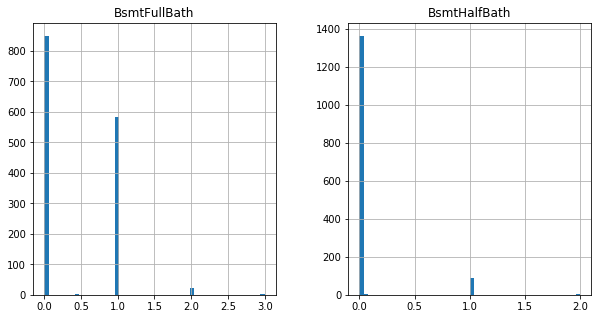

In [1080]:
X_comp_grgfill[["BsmtHalfBath", "BsmtFullBath"]].hist(bins=50, figsize=(10,5))
plt.show()

Na histogramie widzimy też, że 0 jest najczęściej występującą wartością. Podstawmy ją do obiektu dataframe i sprawdźmy rezultat:

In [1056]:
X_comp_bsmtfill = X_comp_grgfill.copy()

X_comp_bsmtfill.loc[660, "BsmtHalfBath"] = 0
X_comp_bsmtfill.loc[660, "BsmtFullBath"] = 0
X_comp_bsmtfill.loc[728, "BsmtHalfBath"] = 0
X_comp_bsmtfill.loc[728, "BsmtFullBath"] = 0

best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
best_column_number = 142

best_model.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]], y)
predict_bsmtfill = best_model.predict(X_comp_bsmtfill[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]])
solution_bsmtfill = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_bsmtfill, name="SalePrice")], axis=1)
file_name = 'solution32' + '.csv'
solution_bsmtfill.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Zmiana okazała się zbyt mała, żeby wpłynęła na wynik zwracany przez serwis Kaggle. Udało mi się jednak znaleźć plik z rozwiązaniem generującym 0.00000 punktów w konkursie - możemy dzięki niemu sprawdzić czy predykcje domów z określonymi indeksami przybliżyły się odpowiednich cen.

Adres rozwiązania:
https://www.kaggle.com/carlmcbrideellis/house-prices-advanced-regression-solution-file

In [1084]:
new_660 = predict_bsmtfill[660]
new_728 = predict_bsmtfill[728]
print("Nowe predykcje:", new_660, new_728)

old_660 = 101874.23 # data from solution31.csv
old_728 = 211064.33
print("Stare predykcje:", old_660, old_728)

real_660 = 79000.0 # data from kagle carlmcbrideellis file
real_728 = 284700.0
print("Realna wartość:", real_660, real_728)

rmse_old = (real_660 - old_660)**2 + (real_728 - old_728)**2
rmse_new = (real_660 - new_660)**2 + (real_660 - old_660)**2
print("Suma kwadratów błędów dwóch starych predykcji:", rmse_old)
print("Suma kwadratów błędów dwóch nowych predykcji: ", rmse_new)

Nowe predykcje: 101687.4 210983.88
Stare predykcje: 101874.23 211064.33
Realna wartość: 79000.0 284700.0
Suma kwadratów błędów dwóch starych predykcji: 5945442294.441801
Suma kwadratów błędów dwóch nowych predykcji:  1037948445.9547772


Ceny obydwu predykcji były (i nadal są) za wysokie. Podmiana wartości BsmtHalfBath i BsmtFullBath zmniejszyła wyliczone ceny o 100$ - 200$ w obydwy przypadkach, co zmniejszyło sumę kwadratów błędów dwóch predykcji niemal 6-krotnie.

Zmiana poprawiła wyniki - zostawimy ją w modelu.

## 14. Logarytm SalePrice

Ceny, jak i wypłaty mają tendencje do posiadania rozkładu mocno odbiegającego od normalnego - z bardzo długim "ogonem" z prawej strony. Zobaczmy rozkład SalePrice dla pliku train.csv:

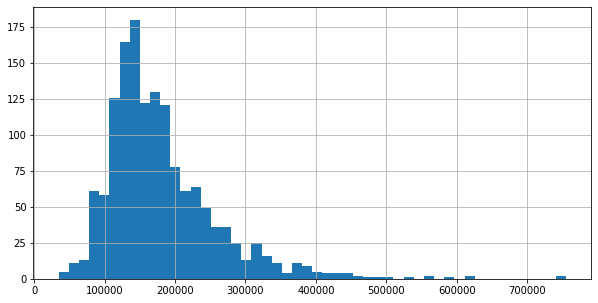

In [1058]:
y.hist(bins=50, figsize=(10,5))
plt.show()

Przy okazji zauważmy wartości naprawdę mocno odbiegające od typowych. Wyświetlimy kilka największych i najmniejszych, warto przyjrzeć się sprawie dokładniej w dalszej części pracy:

In [1088]:
y.sort_values().head(10)

495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
Name: SalePrice, dtype: int64

In [1090]:
y.sort_values().head(10)

495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
Name: SalePrice, dtype: int64

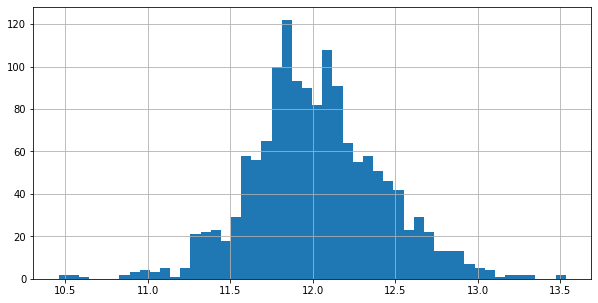

In [1061]:
np.log(y).hist(bins=50, figsize=(10,5))
plt.show()

Widzimy już dużo bardziej "rozsądny" rozkład. Sprawdźmy wpływ zmiany na wynik modelu: 

In [1063]:
best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
best_column_number = 142

best_model.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]], np.log(y))
predict_log = best_model.predict(X_comp_grgfill[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]])
predict_log_exp = np.exp(predict_log)
solution_log_exp = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_log_exp, name="SalePrice")], axis=1)
file_name = 'solution33' + '.csv'
solution_log_exp.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Model dał nieco gorszy wynik. Spróbujmy ponownego strojenia - tym razem dla 10-krotnej walidacji ze "stratyfikacją" (stratified k fold cross validation)

In [1072]:
from sklearn.model_selection import StratifiedKFold

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [100, 200, 400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=10,
                 n_jobs=-1)

for features_number in [142]:
    gs = gs.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], np.log(y))
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], np.log(y))
    predict_xgb_pwrtran = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(np.exp(predict_xgb_pwrtran), name="SalePrice")], axis=1)
    file_name = 'solution34_' + str(features_number) + '.csv'
    xgb_solution_pwrtran.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


gs.best_score_ -0.014916738594734698
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.75}
cross_val_score for 142 number: 0.9036099782463018


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [1073]:
xgb_solution_pwrtran = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(np.exp(predict_xgb_pwrtran), name="SalePrice")], axis=1)
file_name = 'solution34_' + str(features_number) + '.csv'
xgb_solution_pwrtran.to_csv(file_name, index=False)

Ponownie nie udało się poprawić wyniku - pogorszenie z 0.12586 na 0.12948. Możliwe, że głębsza analiza liczby cech lub zmiana w strojeniu modelu umożliwiłyby osiągnięcie lepszego rezultatu.

## 15. Usunięcie wartości odstających ("outliers")

### 15.1 Usunięcie punktów, których predykcja najbardziej różniła się od realnej ceny

Spróbujemy za pomocą pakietu statsmodels znaleźć w predykcjach wartości, które najmocniej odstają od realnych cen mieszkań. Mogą negatywnie wpływać na jakość modelu. Usuniemy je, przetrenujemy model bez nich i sprawdzimy ponownie wyniki:

D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Outliers:  [(4, 287743.1, 250000), (13, 237166.86, 279500), (462, 110115.39, 62383), (632, 146009.88, 82500), (688, 334009.78, 392000), (714, 169695.7, 130500), (774, 347867.6, 395000), (970, 89163.46, 135000), (1324, 195469.94, 147000)]


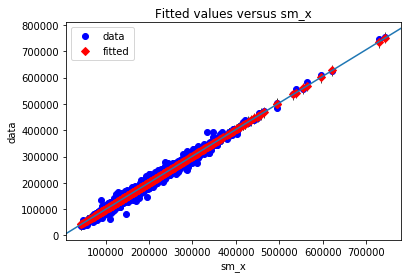

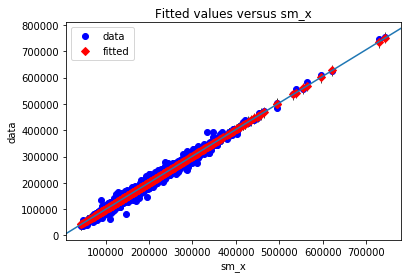

In [1145]:
import statsmodels.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics

best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
best_column_number = 142


best_model.fit(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]], y)
sm_x = best_model.predict(X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]])
sm_y = y.values

#make fit
regression = ols("data ~ sm_x", data=dict(data=sm_y, x=sm_x)).fit()

#find outliers
test = regression.outlier_test()
outliers = ((i, sm_x[i], sm_y[i]) for i,t in enumerate(test.iloc[:,2]) if t < 0.5)
print('Outliers: ', list(outliers))
figure = smgraphics.regressionplots.plot_fit(regression, 1)
smgraphics.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])

In [1151]:
X_scale_outliers = X_scale_rmdhalf.drop(X_scale_rmdhalf.index[[4,13,462,632,688,714,774,970,1324]])
y_outliers = y.drop(y.index[[4,13,462,632,688,714,774,970,1324]])

best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
best_column_number = 142

best_model.fit(X_scale_outliers[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]], y_outliers)
predict_bsmtfill = best_model.predict(X_comp_bsmtfill[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]])
solution_bsmtfill = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_bsmtfill, name="SalePrice")], axis=1)
file_name = 'solution35.csv'
solution_bsmtfill.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [1155]:
X_comp_sc_rmdh_filled =  X_comp_scale_rmdhalf.copy()

for mi_column in mi_scale_lot_with_columns.index.values:
    if not np.isin(mi_column, X_comp_sc_rmdh_filled.columns.values):
        X_comp_sc_rmdh_filled[mi_column] = 0

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [100, 200, 400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

for features_number in [142]:
    gs = gs.fit(X_scale_outliers[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y_outliers)
    print('gs.best_score_', gs.best_score_)
    print('gs.best_params_', gs.best_params_)

    clf = gs.best_estimator_
    print('cross_val_score for', features_number, 'number:', cross_val_score(clf, X_scale_outliers[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]].sort_index(), y_outliers, cv=15, n_jobs=-1).mean())
    clf.fit(X_scale_outliers[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]], y_outliers)
    predict_outliers = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:features_number]])
    solution_outliers = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_outliers, name="SalePrice")], axis=1)
    file_name = 'solution36_' + str(features_number) + '.csv'
    solution_outliers.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not No

gs.best_score_ -602424163.8561307
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 0.5}
cross_val_score for 142 number: 0.9043675104056536


D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Usunięcie wartości odstających nie poprawiło wyniku, jednak warto dalej eksperymentować z narzędziem (np. zmiana progu, od którego wartość jest uznana za 'outlier'), także z innymi sposobami usuwania wartości odstających (np. graficzne przedstawienie kolejnych kolumn z SalePrice, wbudowane narzędzia pakietu sklearn jak IsolationForest).

Spróbujemy jeszcze dwóch modeli z innymi punktami odcięcia wartości odstających. Sprawdźmy najpierw, ile wartości odstających otrzymamy przy konkretnym progu 'bonf(p)':

In [1173]:
test.sort_values(by='bonf(p)').head(15)

,student_resid,unadj_p,bonf(p)
632,-5.987085,2.685927e-09,0.000004
688,5.312432,1.249736e-07,0.000182
1324,-4.596287,4.672700e-06,0.006822
970,4.441011,9.629374e-06,0.014059
462,-4.422140,1.049801e-05,0.015327
774,4.252585,2.247675e-05,0.032816
13,3.923963,9.116256e-05,0.133097
4,-3.687608,2.346864e-04,0.342642
714,-3.679498,2.422054e-04,0.353620
681,3.495222,4.878675e-04,0.712287


Możemy też pokazać konkretne wartości predykcji przyrównane do realnych cen mieszkań.

In [1179]:
print("realna cena / predykcja")
def print_real_val_and_pred(index):
    print(sm_y[index], " / ", sm_x[index])
print_real_val_and_pred(632)
print_real_val_and_pred(688)
print_real_val_and_pred(1324)
print_real_val_and_pred(970)
print_real_val_and_pred(462)
print_real_val_and_pred(774)
print_real_val_and_pred(13)
print_real_val_and_pred(4)
print_real_val_and_pred(714)
print_real_val_and_pred(681)
print_real_val_and_pred(142)
print_real_val_and_pred(965)
print_real_val_and_pred(966)
print_real_val_and_pred(977)
print_real_val_and_pred(967)

realna cena / predykcja
82500  /  146009.88
392000  /  334009.78
147000  /  195469.94
135000  /  89163.46
62383  /  110115.39
395000  /  347867.6
279500  /  237166.86
250000  /  287743.1
130500  /  169695.7
159434  /  123070.016
166000  /  129737.8
178900  /  175244.11
160000  /  160637.94
199900  /  202858.12
135000  /  139112.5


Najpierw usuńmy 6 pierwszych elementów - mają one o rząd wielkości mniejszy współczynnik 'bonf(p)'. Ponownie wyćwiczymy model i sprawdzimy rozwiązanie w serwisie kaggle:

In [1174]:
X_scale_outliers2 = X_scale_rmdhalf.drop(X_scale_rmdhalf.index[[632, 688, 1324, 970, 462, 774]])
y_outliers2 = y.drop(y.index[[632, 688, 1324, 970, 462, 774]])

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [100, 200, 400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_outliers2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers2)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print('cross_val_score:', cross_val_score(clf, X_scale_outliers2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]].sort_index(), y_outliers2, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_outliers2[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers2)
predict_outliers2 = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]])
solution_outliers2 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_outliers2, name="SalePrice")], axis=1)
file_name = 'solution39.csv'
solution_outliers2.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not No

gs.best_score_ -608729480.9919887
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 550, 'xgbregressor__subsample': 0.75}
cross_val_score: 0.8987640337313205


D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


A teraz sprawdźmy wynik dla usunięcia wszystkich prób z współczynnikiem 'bonf(p)' poniżej 1:

In [1175]:
X_scale_outliers3 = X_scale_rmdhalf.drop(X_scale_rmdhalf.index[[632, 688, 1324, 970, 462, 774, 13, 4, 714, 681, 142]])
y_outliers3 = y.drop(y.index[[632, 688, 1324, 970, 462, 774, 13, 4, 714, 681, 142]])

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1, 0.2],
             'xgbregressor__n_estimators': [100, 200, 400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75, 1.0]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_outliers3[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers3)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print('cross_val_score:', cross_val_score(clf, X_scale_outliers3[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]].sort_index(), y_outliers3, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_outliers3[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers3)
predict_outliers3 = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]])
solution_outliers3 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_outliers3, name="SalePrice")], axis=1)
file_name = 'solution40.csv'
solution_outliers3.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not No

gs.best_score_ -518775783.4738821
gs.best_params_ {'xgbregressor__learning_rate': 0.075, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 500, 'xgbregressor__subsample': 0.5}
cross_val_score: 0.9169775312753194


D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Sprawdźmy jeszcze 3 strategie - odcięcie kolejno 1, 2, 3 "najgorszych" prób:

In [1177]:
X_scale_outliers4 = X_scale_rmdhalf.drop(X_scale_rmdhalf.index[[632]])
y_outliers4 = y.drop(y.index[[632]])

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1],
             'xgbregressor__n_estimators': [400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_outliers4[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers4)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print('cross_val_score:', cross_val_score(clf, X_scale_outliers4[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]].sort_index(), y_outliers4, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_outliers4[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers4)
predict_outliers4 = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]])
solution_outliers4 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_outliers4, name="SalePrice")], axis=1)
file_name = 'solution41.csv'
solution_outliers4.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


gs.best_score_ -612775700.2833353
gs.best_params_ {'xgbregressor__learning_rate': 0.075, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 0.5}
cross_val_score: 0.9023500080698795


D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [1180]:
X_scale_outliers5 = X_scale_rmdhalf.drop(X_scale_rmdhalf.index[[632, 688]])
y_outliers5 = y.drop(y.index[[632, 688]])

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1],
             'xgbregressor__n_estimators': [400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_outliers5[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers5)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print('cross_val_score:', cross_val_score(clf, X_scale_outliers5[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]].sort_index(), y_outliers5, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_outliers5[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers5)
predict_outliers5 = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]])
solution_outliers5 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_outliers5, name="SalePrice")], axis=1)
file_name = 'solution42.csv'
solution_outliers5.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not No

gs.best_score_ -649929855.1562948
gs.best_params_ {'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 400, 'xgbregressor__subsample': 0.75}
cross_val_score: 0.8934279785406843


D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [1181]:
X_scale_outliers6 = X_scale_rmdhalf.drop(X_scale_rmdhalf.index[[632, 688, 1324]])
y_outliers6 = y.drop(y.index[[632, 688, 1324]])

pipe_xgb = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror"))

param_grid = [{'xgbregressor__learning_rate' : [0.025, 0.05, 0.075, 0.1],
             'xgbregressor__n_estimators': [400, 450, 500, 550],
             'xgbregressor__max_depth': [2,3,4,5],
              'xgbregressor__subsample': [0.5, 0.75]}]

gs = GridSearchCV(estimator = pipe_xgb,
                 param_grid=param_grid,
                 scoring='neg_mean_squared_error',
                 cv=15,
                 n_jobs=-1)

gs = gs.fit(X_scale_outliers6[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers6)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

clf = gs.best_estimator_
print('cross_val_score:', cross_val_score(clf, X_scale_outliers6[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]].sort_index(), y_outliers6, cv=15, n_jobs=-1).mean())
clf.fit(X_scale_outliers6[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]], y_outliers6)
predict_outliers6 = clf.predict(X_comp_sc_rmdh_filled[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]])
solution_outliers6 = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_outliers6, name="SalePrice")], axis=1)
file_name = 'solution43.csv'
solution_outliers6.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not No

gs.best_score_ -571896571.1572287
gs.best_params_ {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 500, 'xgbregressor__subsample': 0.75}
cross_val_score: 0.9059572914171915


D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Niestety wszystkie strategie dały wynik gorszy od dotychczasowej najlepszej.

### 15.2 Analiza największych/najmniejszych wartości najistotniejszych cech

Wybierzemy kilka najważniejszych cech numerycznych i poszukamy wartości, które są znacząco większe/mniejsze od pozostałych skrajnych. Zrobimy to "ręcznie":

In [1191]:
print(X_scale_rmdhalf["TotalBsmtSF"].sort_values(ascending=False).head(10))
print(X_comp_sc_rmdh_filled["TotalBsmtSF"].sort_values(ascending=False).head(10))

1298    6110.0
332     3206.0
496     3200.0
523     3138.0
440     3094.0
1373    2633.0
1044    2524.0
691     2444.0
1182    2396.0
224     2392.0
Name: TotalBsmtSF, dtype: float64
1089    5095.0
19      2846.0
803     2660.0
203     2630.0
832     2552.0
514     2535.0
217     2492.0
916     2461.0
245     2458.0
211     2452.0
Name: TotalBsmtSF, dtype: float64


In [1192]:
print(X_scale_rmdhalf["GrLivArea"].sort_values(ascending=False).head(10))
print(X_comp_sc_rmdh_filled["GrLivArea"].sort_values(ascending=False).head(10))

1298    5642.0
523     4676.0
1182    4476.0
691     4316.0
1169    3627.0
185     3608.0
304     3493.0
1268    3447.0
635     3395.0
769     3279.0
Name: GrLivArea, dtype: float64
1089    5095.0
728     3820.0
1362    3672.0
1222    3500.0
1168    3390.0
964     3086.0
871     3078.0
278     3005.0
838     2956.0
579     2944.0
Name: GrLivArea, dtype: float64


In [1193]:
print(X_scale_rmdhalf["GarageCars"].sort_values(ascending=False).head(10))
print(X_comp_sc_rmdh_filled["GarageCars"].sort_values(ascending=False).head(10))

420     4.0
747     4.0
1350    4.0
1190    4.0
1340    4.0
272     3.0
1241    3.0
270     3.0
1243    3.0
231     3.0
Name: GarageCars, dtype: float64
368     5.0
115     4.0
1368    4.0
403     4.0
402     4.0
401     4.0
777     4.0
1445    4.0
1139    4.0
510     4.0
Name: GarageCars, dtype: float64


In [1195]:
print(X_scale_rmdhalf["YearBuilt"].sort_values().head(10))
print(X_comp_sc_rmdh_filled["YearBuilt"].sort_values().head(10))

1349    1872.0
1137    1875.0
747     1880.0
304     1880.0
1132    1880.0
630     1880.0
991     1882.0
106     1885.0
1416    1885.0
945     1890.0
Name: YearBuilt, dtype: float64
991     1879.0
396     1880.0
962     1890.0
636     1890.0
78      1890.0
646     1890.0
329     1890.0
757     1895.0
1119    1895.0
966     1895.0
Name: YearBuilt, dtype: float64


In [1196]:
print(X_scale_rmdhalf["GarageArea"].sort_values(ascending=False).head(10))
print(X_comp_sc_rmdh_filled["GarageArea"].sort_values(ascending=False).head(10))

1298    1418.0
581     1390.0
1190    1356.0
1061    1248.0
825     1220.0
178     1166.0
664     1134.0
1417    1069.0
270     1053.0
1228    1052.0
Name: GarageArea, dtype: float64
611     1488.0
701     1348.0
495     1314.0
420     1231.0
964     1200.0
368     1184.0
834     1174.0
1089    1154.0
510     1150.0
404     1138.0
Name: GarageArea, dtype: float64


Największą uwagę zwraca kolumna "TotalBsmtSF". Maksymalna wartość w zestawie train.csv jest aż 90% większa od drugiej największej. Niestety zestaw test.csv zawiera również kilka bardzo dużych wartości. Trudno określić jak usunięcie tej jednej próby może wpłynąć na cały model.

Warto zastanowić się również nad cechami GarageArea i GrLivArea - tutaj różnice nie są już aż tak spektakularne, jednak wartości maksymalne są odpowiednio 35%/72% większe od 10-tej największej wartości.

Najprierw sprawdzimy model dla usunięcia maksymalnej wartości TotalBsmtSF w train.csv (zauważmy, że to próba z jednocześnie maksymalną wartością "GrLivArea"):

In [1205]:
X_bsmt_outlier = X_scale_rmdhalf.copy().drop(1298)

best_model = make_pipeline(PowerTransformer(), XGBRegressor(n_jobs=-1, random_state=0, objective="reg:squarederror", learning_rate= 0.025, max_depth= 4, n_estimators= 550, subsample= 0.5))
best_column_number = 142

best_model.fit(X_bsmt_outlier[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]], y.drop(1298))
predict_bsmt_outlier = best_model.predict(X_comp_bsmtfill[mi_scale_lot_with_columns.sort_values(ascending=False).index[:best_column_number]])
solution_bsmt_outlier = pd.concat([pd.read_csv("test.csv")["Id"], pd.Series(predict_bsmt_outlier, name="SalePrice")], axis=1)
file_name = 'solution44' + '.csv'
solution_bsmt_outlier.to_csv(file_name, index=False)

D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\soft\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
D:\soft\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Model osiągnął zauważalnie gorszy wynik.

## 16. Co zrobiłbym z obecną wiedzą:

- użycie algorytmów LightGBM, CatBoost
- strojenie algorytmów za pomocą Bayesian Optimization
- zastosowanie w modelu ze skalą liczbową części cech poprzedniej strategii (kodowania "gorącojedynkowego" OHE)
- algorytmy PCA/centroidy w zestawach powiązanych cech (np. te powiązane z garażem, piwnicą, datami, metrażem)
- pozbycie się z modelu części cech lub dodanie tych, które obecnie nie są używane - można sprawdzać wyniki walidacji krzyżowej najpierw usuwając po jednej kolumnie, a następnie dodając po jednej z nieużywanych - metoda wprawdzie nie daje pewnych wyników, jednak może ułatwić zauważenie pewnych tendencji
- inne podejścia do szukania wartości odstających (outliers)
- analiza zestawów cech podobna do "7. Analiza cech z podanym rokiem" + sprawdzenie spójności danych
- zastanowienie się nad cechą "Neighborhood" - z jednej strony informacja o lokalizacji mieszkania ma ogromny wpływ na jego cenę, z drugiej - liczba kategorii może być tutaj po prostu za duża; przemyśleć zastosowania kodowania docelowego (target encoding)
- analiza skorelowanych cech - może warto pozbyć się części lub zastosować na nich algorytm PCA
- transformacja rozkładu tylko części cech (np. same liczbowe, same kategorialne, tylko te z rozkładem mocno odbiegającym od normalnego)
- przy silniejszym sprzęcie - walidacja LOOCV
- analiza histogramów cech, szukanie nietypowych rozkładów i wartości (może ją ułatwić kod poniżej)

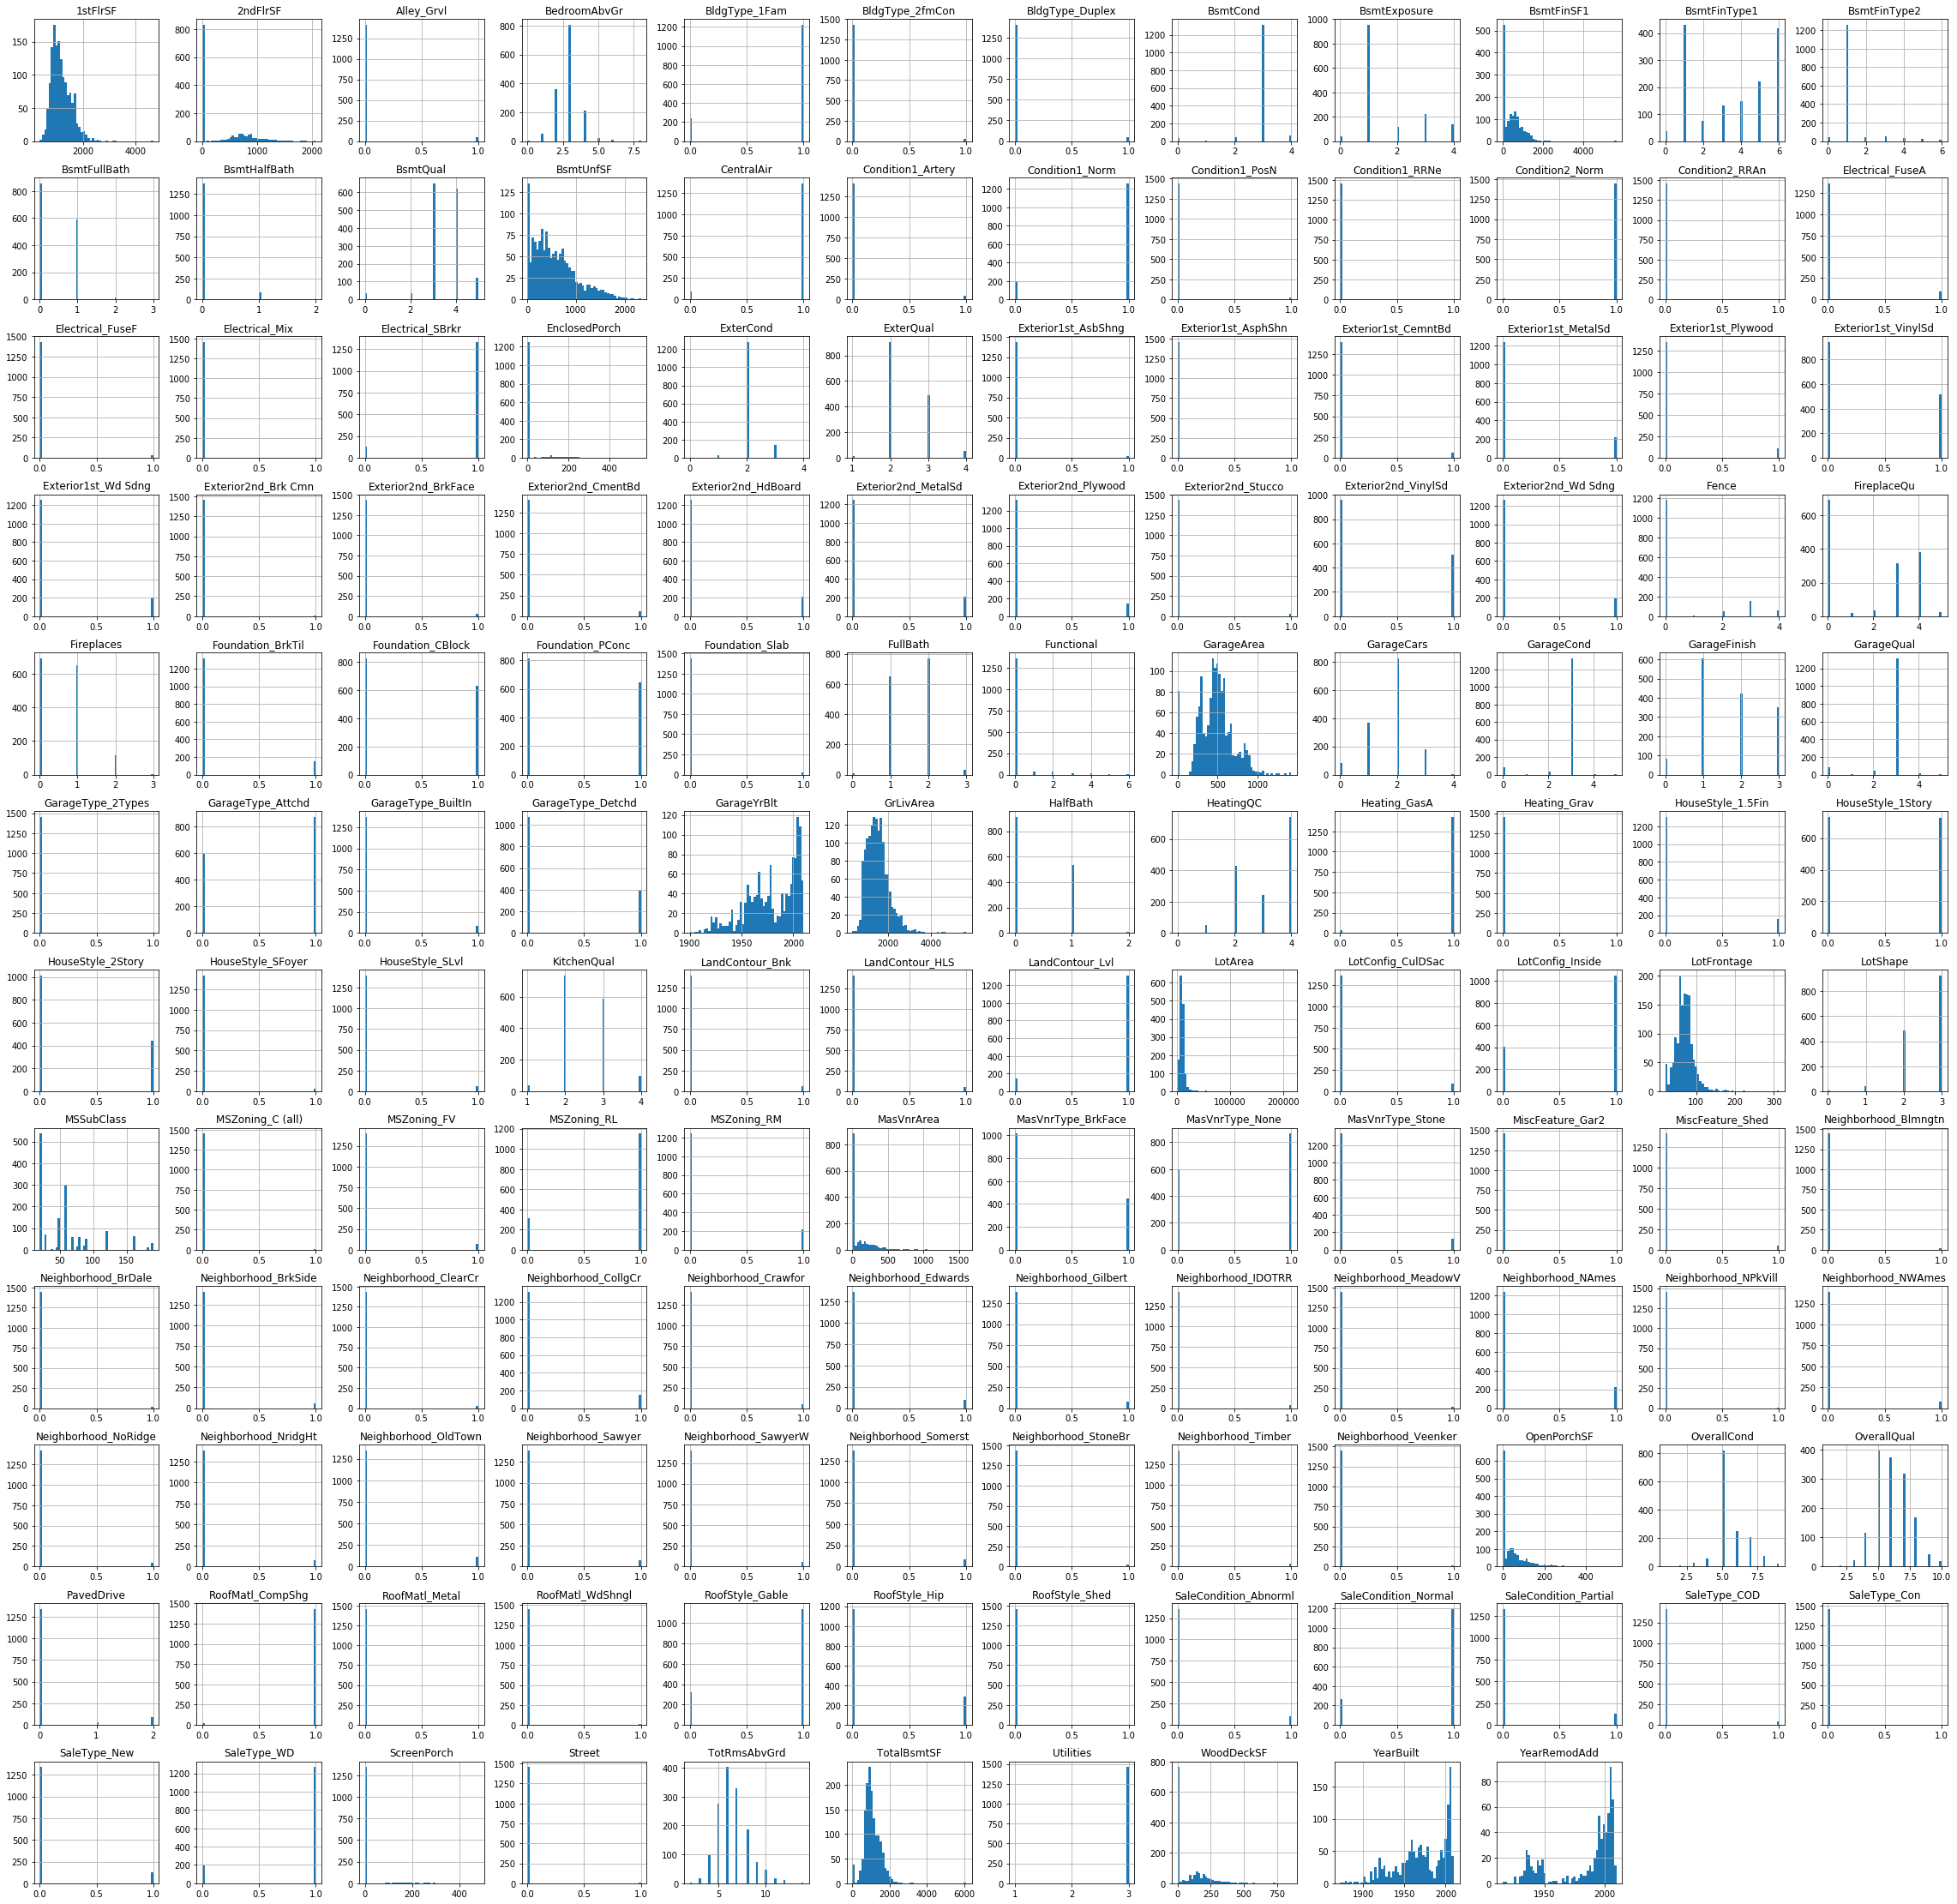

In [1182]:
import matplotlib.pyplot as plt

X_scale_rmdhalf[mi_scale_lot_with_columns.sort_values(ascending=False).index[:142]].hist(bins=50, figsize=(40,40))
plt.show()